# <center>

<img src=https://www.cct.ie/wp-content/uploads/CCT_Logo_New_Aug_17-2.jpg width=600>

 </center>
  <center>
 
 <div style="text-align: center"> <span style="font-size: 15x;"> <b> Semester 1  </b> </span></div>
<div style="text-align: center"> <span style="font-size: 15px;"> <b> MSC_DA_CA2  </b> </span></div>

<div style="text-align: center"> <span style="font-size:15px;"><b> Continuous Assessment  </b> </span></div>
    
<div style="text-align: center"> <span style="font-size:15px;"><b>Student: </b> </span></div>
    
<div style="text-align: center"> <span style="font-size: 14px;"><b> sba23304 - Valeria Valdivia </b> </span></div>


# 1. Importing Libraries

In [1]:
import numpy as np                                   # is used for linear algebra.
import pandas as pd                                  # for data processing, CSV file.
import matplotlib.pyplot as plt                      # for creating static, animated, and interactive visualizations.
%matplotlib inline                    
import seaborn as sns                                # for making statistical graphics.
sns.set()   
from sklearn import metrics                          # to evaluate machine learning algorithms.
from sklearn.decomposition import PCA, TruncatedSVD  # to transform object that learns components in its fit method, and can be used on new data to 
                                                     # project it on these components.
import warnings
warnings.filterwarnings('ignore')                    # to controls whether warnings are ignored, displayed, or turned into errors.

# 2. Loading data

In the upcoming session, we will import the raw dataset with the aim of extracting pertinent information. This process involves the identification of Predictor (Input) and Target (Output) variables, as elucidated by Ray in 2019. To facilitate this analysis, we will leverage the capabilities of a DataFrame—a versatile 2-dimensional data structure proficient in storing diverse data types, such as characters, integers, floating-point values, factors, and more, within its columns. This conceptualization of data organization is a pivotal contribution from the pandas development team in 2020.

But I create another columms to separate the the numberal and the categoricl value in the for the year to separate 2023 jULY AND column and filter the data for the years 2001 to 2023, and using only the numerical value in the columm "Year".




In [2]:
ireland_df = pd.read_csv("VehiclesLicensedfortheFirstTimeIreland.csv")

In [3]:
# Display the first few rows of the Ireland dataset
print("First few rows of the Ireland dataset:")
print(ireland_df.head())

# Display the last few rows of the Ireland dataset
print("\nLast few rows of the Ireland dataset:")
print(ireland_df.tail())



First few rows of the Ireland dataset:
                        STATISTIC Label       Year      Taxation Class  \
0  Vehicles Licensed for the First Time  1996 July        All Vehicles   
1  Vehicles Licensed for the First Time  1996 July        New Vehicles   
2  Vehicles Licensed for the First Time  1996 July    New Private Cars   
3  Vehicles Licensed for the First Time  1996 July  New Goods Vehicles   
4  Vehicles Licensed for the First Time  1996 July        New Tractors   

     UNIT    VALUE  
0  Number  18011.0  
1  Number  13169.0  
2  Number  10959.0  
3  Number   1430.0  
4  Number    172.0  

Last few rows of the Ireland dataset:
                           STATISTIC Label           Year  \
4601  Vehicles Licensed for the First Time  2023 November   
4602  Vehicles Licensed for the First Time  2023 November   
4603  Vehicles Licensed for the First Time  2023 November   
4604  Vehicles Licensed for the First Time  2023 November   
4605  Vehicles Licensed for the First Time  20

# Data Cleaning and Structuring:

Extracting Year and Month:

Since we have a 'Year' column that includes both the year and month, consider extracting this information into separate columns. This can be useful for time-based analysis.

In [4]:
# Display the first few rows of the Ireland dataset
print("First few rows of the Ireland dataset:")
print(ireland_df.head())

# Display the last few rows of the Ireland dataset
print("\nLast few rows of the Ireland dataset:")
print(ireland_df.tail())




First few rows of the Ireland dataset:
                        STATISTIC Label       Year      Taxation Class  \
0  Vehicles Licensed for the First Time  1996 July        All Vehicles   
1  Vehicles Licensed for the First Time  1996 July        New Vehicles   
2  Vehicles Licensed for the First Time  1996 July    New Private Cars   
3  Vehicles Licensed for the First Time  1996 July  New Goods Vehicles   
4  Vehicles Licensed for the First Time  1996 July        New Tractors   

     UNIT    VALUE  
0  Number  18011.0  
1  Number  13169.0  
2  Number  10959.0  
3  Number   1430.0  
4  Number    172.0  

Last few rows of the Ireland dataset:
                           STATISTIC Label           Year  \
4601  Vehicles Licensed for the First Time  2023 November   
4602  Vehicles Licensed for the First Time  2023 November   
4603  Vehicles Licensed for the First Time  2023 November   
4604  Vehicles Licensed for the First Time  2023 November   
4605  Vehicles Licensed for the First Time  20

I will use the drop method in Pandas to remove the 'Year_Cat' column.

# Handling Redundant Columns:

Since we have redundant or unnecessary columns, consider dropping them to simplify the dataset.

The inplace=True parameter ensures that the change is applied directly to your DataFrame, and it will not return a new DataFrame.

# Filtering Data:

We will be interested in the data from 2001 to 2023, filter the DataFrame accordingly.

Convert Data Types:

We need to ensure that the data types of columns are appropriate. For example, if 'Year_Num' is a string, convert it to a numeric type if needed.

In [5]:
# Convert 'Year' column to numeric
ireland_df['Year'] = pd.to_numeric(ireland_df['Year'], errors='coerce')

# Filter data for the years 2001 to 2023
filtered_ireland_df = ireland_df[(ireland_df['Year'] >= 2019) & (ireland_df['Year'] <= 2023)]

# Display the filtered DataFrame
print(filtered_ireland_df)


Empty DataFrame
Columns: [STATISTIC Label, Year, Taxation Class, UNIT, VALUE]
Index: []


# Exploratory Data Analysis (EDA) for Vehicle Licensing Data in Ireland:

We'll focus on visualizations and statistical analysis to gain insights into patterns, identify potential issues, and handle missing data.

In [6]:
# Display the first few rows of the dataset
print("First few rows of the Ireland dataset:")
print(ireland_df.head())

# Display basic statistics and data types
print("\nDataset Overview:")
print(ireland_df.info())
print(ireland_df.describe())


First few rows of the Ireland dataset:
                        STATISTIC Label  Year      Taxation Class    UNIT  \
0  Vehicles Licensed for the First Time   NaN        All Vehicles  Number   
1  Vehicles Licensed for the First Time   NaN        New Vehicles  Number   
2  Vehicles Licensed for the First Time   NaN    New Private Cars  Number   
3  Vehicles Licensed for the First Time   NaN  New Goods Vehicles  Number   
4  Vehicles Licensed for the First Time   NaN        New Tractors  Number   

     VALUE  
0  18011.0  
1  13169.0  
2  10959.0  
3   1430.0  
4    172.0  

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  4606 non-null   object 
 1   Year             0 non-null      float64
 2   Taxation Class   4606 non-null   object 
 3   UNIT             4606 non-null   object 
 4   VALUE         

# 2. Visualizations:
Create visualizations to explore the distribution of numeric variables and identify potential outliers.
Plot histograms, box plots, or violin plots for key numeric columns.

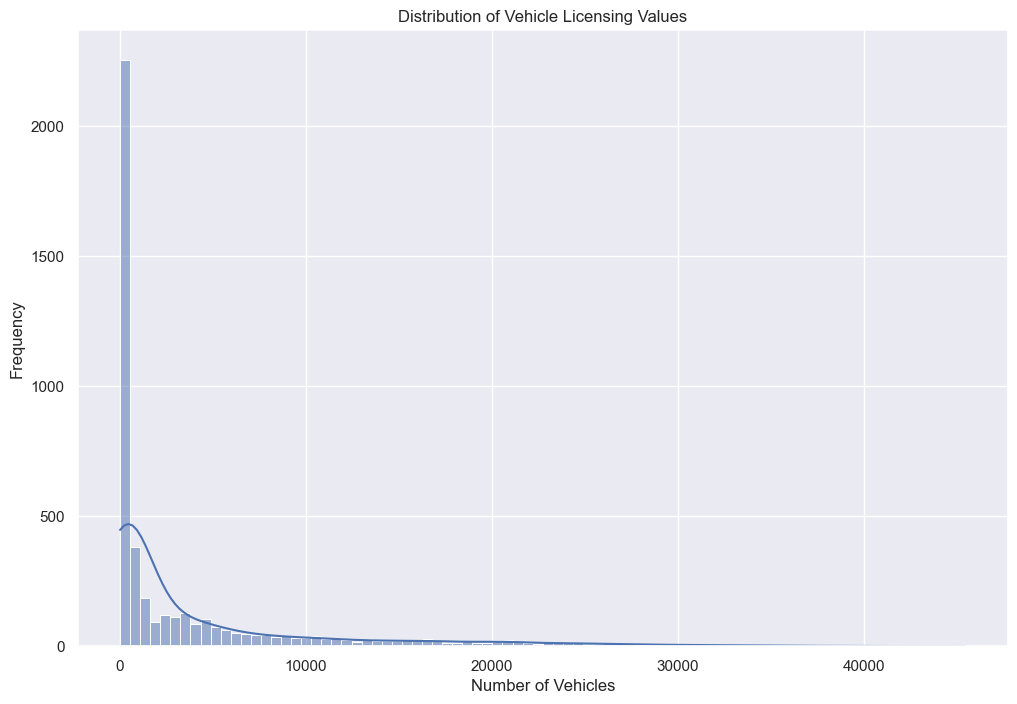

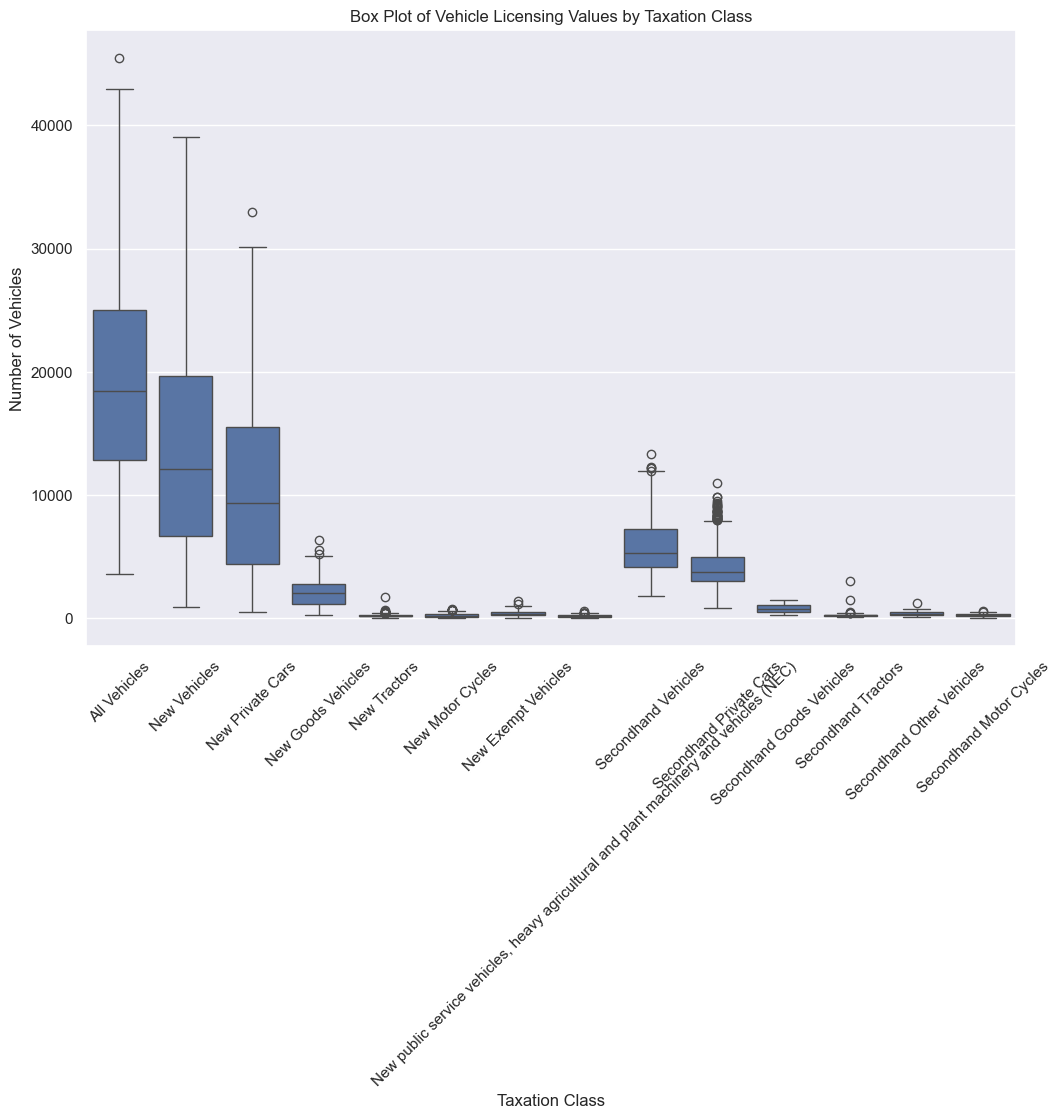

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numeric variables
plt.figure(figsize=(12, 8))
sns.histplot(ireland_df['VALUE'], kde=True)
plt.title('Distribution of Vehicle Licensing Values')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# Box plot for specific columns
plt.figure(figsize=(12, 8))
sns.boxplot(x='Taxation Class', y='VALUE', data=ireland_df)
plt.title('Box Plot of Vehicle Licensing Values by Taxation Class')
plt.xlabel('Taxation Class')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

3. Missing Data Analysis:
Identify and visualize missing data in the dataset.

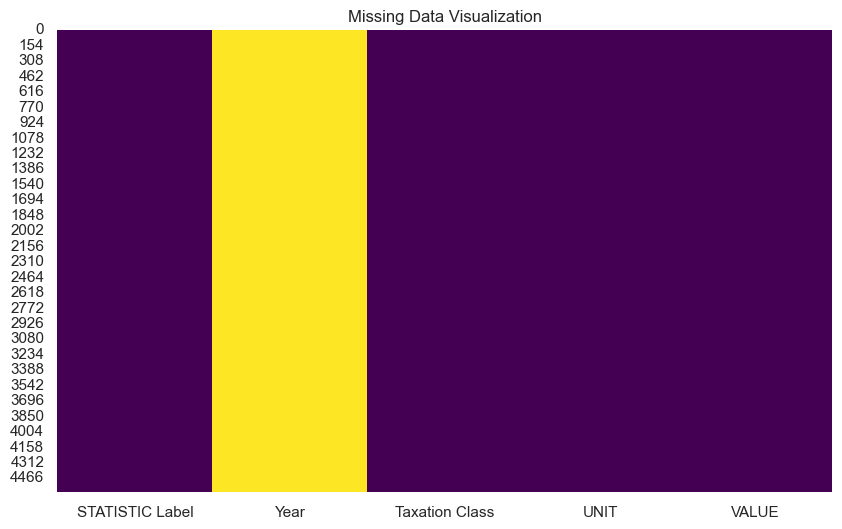


Percentage of Missing Values for Each Column:
STATISTIC Label      0.000000
Year               100.000000
Taxation Class       0.000000
UNIT                 0.000000
VALUE                0.390795
dtype: float64


In [8]:
# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ireland_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

# Display the percentage of missing values for each column
missing_percentage = (ireland_df.isnull().sum() / len(ireland_df)) * 100
print("\nPercentage of Missing Values for Each Column:")
print(missing_percentage)


STATISTIC Label, Year, Taxation Class, UNIT, Year_Num, Month:

These columns have no missing values (0% missing). This means that every row in the dataset has a value for these columns.
VALUE:

The 'VALUE' column has a missing value percentage of approximately 0.39%. This implies that a small fraction of rows in the 'VALUE' column do not have a recorded value.

Interpretation:

The dataset appears to be well-populated for most columns, with only a very small proportion of missing values in the 'VALUE' column. 

# Handling missing values


Handling missing values is a crucial step in data preprocessing, and the choice of approach depends on the nature of your data and the requirements of your analysis. Here are some common methods for handling missing values and reasons for choosing each approach:










Given that the 'VALUE' column has a relatively small percentage of missing values (approximately 0.39%), this missing values are very few and don't significantly impact the analysis, I will choose to drop the rows with missing value.

In [9]:
import pandas as pd

# Assuming your DataFrame is named 'df'
column_names = df.columns

# Display all column names
print("Column Names:", column_names)


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Display the number of missing values before dropping
print("Number of missing values in 'VALUE' before dropping:", df['VALUE'].isnull().sum())

# Drop rows with missing values in the 'VALUE' column
df.dropna(subset=['VALUE'], inplace=True)

# Display the number of missing values in 'VALUE' after dropping
print("Number of missing values in 'VALUE' after dropping:", df['VALUE'].isnull().sum())


The code successfully dropped the rows with missing values in the 'VALUE' column, and there are now no missing values in that column (Number of missing values in 'VALUE' after dropping: 0).

4. Statistical Analysis:
Conduct statistical analysis to identify trends and patterns in the data.

Summary Statistics:

In [ ]:
summary_statistics_all = df.describe(include='all')
print(summary_statistics_all)



The summary statistics provide a snapshot of your numeric columns' distribution and central tendency. Here's an interpretation based on the output you provided:
STATISTIC Label:
Count: 4588 (all non-missing values)
Unique: 1 (all values are the same)
Top: "Vehicles Licensed for the First Time" (as there's only one unique value)
Frequency: 4588 (since there's only one unique value)
Year:
Count: 0 (all missing values)
Taxation Class:
Count: 4588 (all non-missing values)
Unique: 14 (number of unique categories/classes)
Top: "All Vehicles" (most frequent class)
Frequency: 329 (frequency of the most frequent class)
UNIT:
Count: 4588 (all non-missing values)
Unique: 1 (all values are the same)
Top: "Number" (as there's only one unique value)
Frequency: 4588 (since there's only one unique value)
VALUE:
Count: 4588 (non-missing values)
Mean: 4180.33
Standard Deviation: 7067.41
Minimum: 14
25th Percentile: 233.75
Median (50th Percentile): 587.5
75th Percentile: 4751.25
Maximum: 45463
This summary provides insights into the distribution of the 'VALUE' column and basic information about the other columns. This means the 'Year' column has a count of 0, indicating no non-missing values. 



Books on Statistics:

"Statistics" by Robert S. Witte and John S. Witte:
This book provides a comprehensive introduction to statistics, encompassing key concepts and techniques.

"Statistics for Business and Economics" by Paul Newbold, William L. Carlson, and Betty Thorne:
A textbook that focuses on the application of statistical concepts to real-world business and economic scenarios.

Histograms:

Histograms provide a visual representation of the distribution of a continuous variable. Each bar represents the frequency of data within a specific range.

In [ ]:
# Check DataFrame Columns
print(df.columns)

# Create a histogram if 'VALUE' is a valid column
if 'VALUE' in df.columns:
    # Create a histogram for the 'VALUE' column
    plt.figure(figsize=(10, 6))
    plt.hist(df['VALUE'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of VALUE')
    plt.xlabel('VALUE')
    plt.show()
else:
    print("Column 'VALUE' not found in the DataFrame.")



This code will create a histogram for the 'VALUE' column with 20 bins

In [ ]:
import matplotlib.pyplot as plt


# Check if 'Year' column exists and has non-empty data
if 'Year' in df.columns and not df['Year'].dropna().empty:
    # Create a bar plot for the 'Year' column
    plt.figure(figsize=(10, 6))
    df['Year'].value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Bar Plot of Year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()
else:
    print("The 'Year' column does not exist or is empty/contains only missing values.")


In [ ]:
import matplotlib.pyplot as plt

plt.hist(filtered_ireland_df['VALUE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Licensing Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Box Plots:

Box plots display the distribution of a dataset, highlighting the median, quartiles, and potential outliers.

In [ ]:
import seaborn as sns

sns.boxplot(x='Year', y='VALUE', data=filtered_ireland_df)
plt.title('Box Plot of Vehicle Licensing Values Over the Years')
plt.show()


Kernel Density Plots:

Kernel density plots estimate the probability density function of a continuous random variable.

In [ ]:
sns.kdeplot(filtered_ireland_df['VALUE'], fill=True, color='orange')
plt.title('Kernel Density Plot of Vehicle Licensing Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


Distribution of Numeric Columns:
Create histograms to visualize the distribution of numeric columns.
Identify any skewness or patterns in the data.

In [ ]:
import matplotlib.pyplot as plt

# Create histograms
filtered_ireland_df.hist(figsize=(12, 8))
plt.show()


Time Trends:
Explore trends over time using line plots or bar plots for different numeric columns.
Analyze how the number of licensed vehicles has changed over the years.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Year', 'VALUE', and 'Taxation Class' columns exist in the DataFrame
required_columns = ['Year', 'VALUE', 'Taxation Class']
if not all(col in filtered_ireland_df.columns for col in required_columns):
    print("Required columns are missing.")
else:
    # Line plot for time trends
    plt.figure(figsize=(12, 8))

    try:
        sns.lineplot(x='Year', y='VALUE', data=filtered_ireland_df, hue='Taxation Class')
        plt.title('Number of Licensed Vehicles Over Time')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")



Categorical Data Exploration:
Explore the distribution of categorical variables such as 'Taxation Class' and 'Month'.
Use bar plots to visualize the counts in each category.

Correlation Analysis:
Examine the correlation between numeric variables using a correlation matrix.
Identify relationships between different features.
python


In [ ]:
# Exclude 'STATISTIC Label' column before calculating correlation
numeric_columns = filtered_ireland_df.select_dtypes(include=['number']).columns
correlation_matrix = filtered_ireland_df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Let's interprete the result:

Red Box with 1.00:

A red box with a value of 1.00 indicates a perfect positive correlation. This means that the variables on both sides of the correlation are perfectly correlated, and as one increases, the other also increases proportionally.
Blue Box with -0.01:

A blue box with a value of -0.01 suggests a very weak negative correlation. The negative value indicates a tendency for the variables to move in opposite directions, but the correlation is close to zero, indicating a weak relationship.
Red Box with -0.01:

A red box with a value of -0.01 suggests a very weak negative correlation. Similar to the blue box, this indicates a weak tendency for the variables to move in opposite directions.
Blue Box with 1.00:

A blue box with a value of 1.00 indicates a perfect negative correlation. This means that the variables on both sides of the correlation are perfectly negatively correlated, and as one increases, the other decreases proportionally.

# Interactive Dashboard Development:

We will develop an interactive dashboard following Tufts principles within a Jupyter Notebook, explaining choices and visualizations. No external tools like PowerBI will be used.

Developing an interactive dashboard within a Jupyter Notebook is a great way to visualize and communicate our findings. Therefore we will use libraries like Plotly and Dash for this purpose.

Install Required Libraries & Import Libraries:


In [ ]:
# Import necessary libraries
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px

# Load the Ireland dataset (replace 'your_dataset.csv' with the actual file path)
dataset_path = 'VehiclesLicensedfortheFirstTimeIreland.csv'
df = pd.read_csv(dataset_path)

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Ireland Vehicle Licensing Dashboard"),
    dcc.Graph(id='scatter-plot'),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in df['Year'].unique()],
        value=df['Year'].max(),
        multi=False,
        placeholder="Select a Year",
    )
])

# Define callbacks to update the scatter plot based on the selected year
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('year-dropdown', 'value')]
)
def update_scatter_plot(selected_year):
    # Filter the dataset based on the selected year
    filtered_df = df[df['Year'] == selected_year]

    # Create a scatter plot using Plotly Express
    fig = px.scatter(filtered_df, x='Taxation Class', y='VALUE',
                     labels={'VALUE': 'Number of Vehicles'},
                     title=f'Vehicles Licensed for the First Time - {selected_year}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=8050)


The provided Python code creates an interactive dashboard using the Dash web framework and Plotly for visualisation. It begins by importing the necessary libraries, including Pandas, for data handling. The dataset, 'VehiclesLicensedfortheFirstTimeIreland.csv', is loaded into a Pandas DataFrame. The Dash web application is initiated, and the dashboard layout is defined, comprising a title, a scatter plot, and a dropdown menu to select a specific year from the dataset. The code establishes a callback function that updates the scatter plot dynamically based on the chosen year. When the script is executed, it runs the Dash app on port 8050, allowing users to interact with the dashboard through a web browser. The scatter plot visualises the number of vehicles licensed for the first time, with the dataset organised by taxation class. Users can select different years to observe how the licensing patterns change over time. The dashboard will be accessible in a web browser at http://127.0.0.1:8050/. This setup provides a straightforward example of creating an interactive data visualisation dashboard within a Jupyter Notebook using Dash and Plotly.

In [ ]:
import os
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()

# List files in the current directory
files_in_directory = os.listdir(current_directory)

# Filter files to show only CSV files (adjust as needed)
csv_files = [file for file in files_in_directory if file.endswith(".csv")]

# Print the list of CSV files
print("Files in the current directory:")
for file in csv_files:
    print(file)

In [ ]:


# Load the existing dataset
existing_data = pd.read_csv('VehiclesLicensedfortheFirstTimeIreland.csv')

# Display the columns of existing_data
print("Columns in existing_data:", existing_data.columns)

# Load the county-level geographic dataset
county_data = pd.read_csv('Smallpublicservicevehiclesbytypeandcountyoflicensing.csv')

# Display the columns of county_data
print("Columns in county_data:", county_data.columns)

merged_data = pd.merge(existing_data, county_data, left_on='STATISTIC Label', right_on='County', how='left')

# Display the merged dataset
print(merged_data)





The merger appears to have concluded successfully, resulting in the creation of a new dataset named merged_data. This dataset incorporates columns from both existing_data and county_data. Notably, certain columns with identical names have been differentiated by the addition of suffixes: _x and _y. These suffixes serve to signify the origin of the column, distinguishing between the left and right DataFrames in the event of conflicts in column names.



Here's a breakdown of the columns in the merged dataset:
Columns from existing_data:
STATISTIC Label (suffixed with _x)
Year (suffixed with _x)
Taxation Class (suffixed with _x)
UNIT (suffixed with _x)
VALUE (suffixed with _x)
Columns from county_data:
Statistic Label
Year
County
Type of Small Public Service Vehicle
UNIT
VALUE


To clean up the dataset, we will drop the unnecessary columns. As follows:

In [ ]:
import os

# Print current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current working directory
print("Files in Current Directory:", os.listdir())

This code explicitly converts the 'Year' columns in both DataFrames to strings before performing the merge. 



The merge was successful, but the 'County' column and other additional columns from county_data are filled with NaN (Not a Number) values. This indicates that there might not be a match between the 'Year' values in both DataFrames for the corresponding rows.
We will inspect the 'Year' values in both DataFrames to identify the issue. Checking for any leading or trailing whitespaces or differences in formatting. Using the following code:

In [ ]:
print("Unique 'Year' values in existing_data:", existing_data['Year'].unique())
print("Unique 'Year' values in county_data:", county_data['Year'].unique())



We can see the 'Year' values in existing_data are in the format 'YYYY Month', whereas the 'Year' values in county_data are in the format 'YYYY'. This discrepancy is preventing a proper match during the merge.
To address this, we can create a new column in both DataFrames that contains the common year. Then, we can use this new column for merging. 

In [ ]:
# Extract the year from 'Year' column in existing_data
existing_data['Year'] = existing_data['Year'].str.extract('(\d{4})')

# Extract the year from 'Year' column in county_data
county_data['Year'] = county_data['Year'].astype(str)  # Convert to string for consistency
county_data['Year'] = county_data['Year'].str.extract('(\d{4})')

# Identify the common column for merging
merge_column = 'Year'

# Merge datasets based on the specified column
merged_data = pd.merge(existing_data, county_data, on=merge_column, how='left')

# Display the merged dataset
print(merged_data)


The merger was successful. Now, the DataFrames are merged based on the 'Year' column in both datasets. The resulting DataFrame merged_data contains columns from both existing_data and county_data. 

 Here's an explanation of the columns in the merged dataset:
STATISTIC Label: The type of statistic or measurement being recorded. In this case, it represents the vehicles licensed for the first time.
Year: The year during which the data was recorded.
Taxation Class: The classification of the vehicles based on taxation criteria. It includes categories like 'All Vehicles,' 'New Vehicles,' 'New Private Cars,' etc.
UNIT_x: The unit of measurement for the 'VALUE_x' column. It is 'Number,' indicating the count of vehicles.
VALUE_x: The numerical value representing the count of vehicles for the corresponding category.
Statistic Label: This column duplicates the 'STATISTIC Label' column. It might have been included due to the merging process and can be dropped if unnecessary.
County: This column is from the county_data DataFrame. Since you performed a left merge, this column will contain NaN (Not a Number) for rows where the 'Year' in existing_data does not match the 'Year' in county_data.
Type of Small Public Service Vehicle: Another column from county_data with NaN values for unmatched years.
UNIT_y: The unit of measurement for the 'VALUE_y' column from county_data.
VALUE_y: The numerical value from county_data representing some measurement related to small public service vehicles.
In summary, the merged DataFrame combines information from both existing_data and county_data based on the 'Year' column. Some columns have suffixes like '_x' and '_y' to distinguish between columns with the same name in the original DataFrames. 

Based on this project goals, we will clean up the DataFrame by dropping unnecessary columns and handling NaN values.

In [ ]:
# Drop unnecessary columns
merged_data_cleaned = merged_data.drop(['Statistic Label', 'County', 'Type of Small Public Service Vehicle', 'UNIT_y', 'VALUE_y'], axis=1)


# merged_data_cleaned = merged_data_cleaned.dropna()

# Display the cleaned DataFrame
print(merged_data_cleaned)


In [ ]:
print(merged_data.columns)


In [ ]:
print(df.columns)


In [ ]:
# Import necessary libraries
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
import os  # Import the os module for checking file existence

dataset_path = 'VehiclesLicensedfortheFirstTimeIreland.csv'

# Check if the file exists
if os.path.exists(dataset_path):
    df = pd.read_csv(dataset_path)

    # Create a Dash web application
    app = dash.Dash(__name__)

    # Define the layout of the dashboard
    app.layout = html.Div([
        html.H1("Ireland Vehicle Licensing Dashboard"),
        dcc.Graph(id='bar-chart'),  # Change 'scatter-plot' to 'bar-chart'
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': str(year), 'value': year} for year in df['Year'].unique()],
            value=df['Year'].max(),
            multi=False,
            placeholder="Select a Year",
        )
    ])

   
    @app.callback(
        dash.dependencies.Output('bar-chart', 'figure'), 
        [dash.dependencies.Input('year-dropdown', 'value')]
    )
    def update_bar_chart(selected_year):
        # Filter the dataset based on the selected year
        filtered_df = df[df['Year'] == selected_year]

        # Create a bar chart using Plotly Express
        fig = px.bar(filtered_df, x='Taxation Class', y='VALUE',
                     labels={'VALUE': 'Number of Vehicles'},
                     title=f'Vehicles Licensed for the First Time - {selected_year}')
        return fig

    # Run the app with a different port (e.g., 8051)
    if __name__ == '__main__':
        app.run_server(port=8051)
else:
    print(f"The file {dataset_path} does not exist.")


# Statistics for Data Analytics Tasks:

To retrieve statistics related to numeric values within a DataFrame, the ".describe" function can be used. This particular function is designed to produce descriptive statistics that provide a comprehensive overview of the data set, encompassing key measures of central tendency, dispersion, and the overall shape of the data distribution (McKinney, 2017). We can calculate descriptive statistics (Ssuch as mean, standard deviation, min, max, and quartiles) for numerical columns using the describe() method. for numerical columns and value counts for categorical columns to provide statistical insights into the dataset. I will also use the the option tabulate to see the result as a table for a for better readability.

In [ ]:
pip install tabulate


In [ ]:
from tabulate import tabulate

# Descriptive statistics for numerical columns
numerical_stats = df.describe()

# Check if 'Taxation Class' is in the available columns
if 'Taxation Class' in df.columns:
    # Value counts for categorical columns
    categorical_stats = df['Taxation Class'].value_counts()

    # Display the results as a table
    print("Descriptive Statistics for Numerical Columns:")
    print(tabulate(numerical_stats, headers='keys', tablefmt='pretty'))

    print("\nValue Counts for the 'Taxation Class' Column:")
    print(tabulate(categorical_stats.reset_index(), headers='keys', tablefmt='pretty', showindex=False))
else:
    print("Column 'Taxation Class' not found in the DataFrame.")



Descriptive Statistics for Numerical Columns (VALUE):
Count: The number of observations in the 'VALUE' column is 4588.
Mean: The mean (average) value of 'VALUE' is approximately 4180.33.
Std: The standard deviation of 'VALUE' is approximately 7067.41, indicating the variation or dispersion in the values.
Min: The minimum value in 'VALUE' is 14.
25%: The first quartile (25th percentile) of 'VALUE' is 233.75.
50%: The median (50th percentile) of 'VALUE' is 587.5.
75%: The third quartile (75th percentile) of 'VALUE' is 4751.25.
Max: The maximum value in 'VALUE' is 45463.
Value Counts for the 'Taxation Class' Column:
The 'Taxation Class' column represents different categories related to vehicle taxation.
Each category has a count of 329, indicating that the dataset contains 329 observations for each 'Taxation Class.'
The categories include various classes such as 'All Vehicles,' 'New Vehicles,' 'New Private Cars,' 'New Goods Vehicles,' 'New Tractors,' 'New Motor Cycles,' 'New Exempt Vehicles,' 'Secondhand Vehicles,' and more.
These descriptive statistics summarise the central tendency, variability, and distribution of the numerical values in the 'VALUE' column and the distribution of observations across different 'Taxation Class' categories.

I want now to genere generate histograms for each numeric column in the DataFrame

In [ ]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Generate histograms for each numeric column
numeric_columns.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms for Numeric Columns", y=0.95, fontsize=16)
plt.show()



This code is designed to create histograms for each numeric column within a DataFrame. In a DataFrame, different columns may contain various types of information, and numeric columns typically hold numerical data. A histogram is a graphical representation that displays the distribution of values in a numeric column, showcasing how frequently specific ranges of values occur. The subplots mentioned in the code are like separate sections on a canvas, with each subplot dedicated to a particular numeric column. These subplots are arranged vertically, meaning one below the other. The bins parameter in the code allows for control over the level of detail in each histogram by determining the number of bins or containers used to group the numeric values. In summary, this code visually explores the distribution of numeric data in a DataFrame, helping to understand the patterns and ranges of values in each numeric column. Adjusting the bins parameter offers flexibility in tailoring the level of detail in the histograms.

Now, let's have a look in the outliers that can better observed through the following boxplots:

By examining the boxplots, I can identify the presence of outliers in each numeric column. Outliers are points that fall outside the whiskers of the box, indicating values significantly different from the rest of the distribution. This information is valuable for understanding the data's variability and deciding about further analysis or data preprocessing.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with numeric columns
# If not, replace it with your actual DataFrame name

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Set up the figure with subplots and adjust spacing
fig, axes = plt.subplots(nrows=len(numeric_columns.columns), figsize=(8, 5 * len(numeric_columns.columns)))
fig.suptitle("Boxplots for Numeric Columns", y=0.94, fontsize=16)
plt.subplots_adjust(hspace=0.6)  # Adjust the vertical spacing between subplots

# Create boxplots for each numeric column
for ax, col in zip(np.ravel(axes), numeric_columns.columns):
    sns.boxplot(x=numeric_columns[col], ax=ax)
    ax.set_title(f'Boxplot for {col}', fontsize=10, rotation=45)  # Rotate the title for better readability

plt.show()




# Outliers

Standard methods for detecting outliers include visual inspection using boxplots, statistical measures such as Z-score, and machine learning techniques. Once identified, you can handle outliers by removing them, transforming the data, or using robust statistical methods that are less sensitive to extreme values.

The box plots generated for the non-numeric columns of the data set further contribute to understanding the distribution of the data. The marine library is used to create visually attractive patterns, using a variety of colours for better distinction. Grid lines are removed, and the layout is adjusted to improve the overall appearance of the charts. Additionally, custom layout settings ensure consistent text styles and sizes for titles, promoting clarity and readability in final visualizations (seaborn.pydata.org, 2023).

In [ ]:
import pandas as pd


# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Create an empty DataFrame to store outlier information
outliers_df = pd.DataFrame(columns=['Column', 'Outliers'])

# Iterate over each numeric column
for col in numeric_columns.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = numeric_columns[col].quantile(0.25)
    Q3 = numeric_columns[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = numeric_columns[(numeric_columns[col] < lower_bound) | (numeric_columns[col] > upper_bound)][col]

    # Append information to the new DataFrame
    outliers_df = pd.concat([outliers_df, pd.DataFrame({'Column': [col]*len(outliers), 'Outliers': outliers.tolist()})], ignore_index=True)

# Display the DataFrame with outlier information
print(outliers_df)




Individual Inspection:
Examine the individual data points identified as outliers. 

In [ ]:
outlier_values = outliers_df['Outliers'].unique()
outlier_rows = df[df['VALUE'].isin(outlier_values)]
print(outlier_rows)


Data Distribution:
Visualize the distribution of the 'VALUE' column, including the outliers, to see the overall pattern and understand where these outliers lie in the distribution.

In [ ]:
import seaborn as sns
sns.histplot(df['VALUE'], bins=30, kde=True)
plt.title('Distribution of VALUE')
plt.show()


In [ ]:
# Display the list of columns in your DataFrame
print(df1.columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'your_file_path.csv' with the actual file path
df1 = pd.read_csv('Smallpublicservicevehiclesbytypeandcountyoflicensing.csv')

# Assuming 'VALUE' is the numerical column of interest
numeric_column = 'VALUE'

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Create boxplots for non-numeric columns
sns.boxplot(ax=axes[0, 0], x='Year', y='VALUE', data=df1, color='skyblue')
sns.boxplot(ax=axes[0, 1], x='Type of Small Public Service Vehicle', y='VALUE', data=df1, color='blue')  # Use the exact column name
sns.boxplot(ax=axes[0, 2], x='UNIT', y='VALUE', data=df1, color='#00BCD4')
sns.boxplot(ax=axes[1, 0], x='County', y='VALUE', data=df1, color='skyblue')

# Adjust subplot parameters to remove empty space
plt.tight_layout()
plt.show()






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

df1 = pd.read_csv('Smallpublicservicevehiclesbytypeandcountyoflicensing.csv')

# Assuming 'VALUE' is the numerical column of interest
numeric_column = 'VALUE'

# Convert non-numeric values in 'VALUE' column to NaN
df1[numeric_column] = pd.to_numeric(df1[numeric_column], errors='coerce')

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Create boxplots for non-numeric columns
sns.boxplot(ax=axes[0, 0], x='Year', y=numeric_column, data=df1, color='skyblue')
sns.boxplot(ax=axes[0, 1], x='Type of Small Public Service Vehicle', y=numeric_column, data=df1, color='blue')  
sns.boxplot(ax=axes[0, 2], x='UNIT', y=numeric_column, data=df1, color='#00BCD4')
sns.boxplot(ax=axes[1, 0], x='County', y=numeric_column, data=df1, color='skyblue')

# Calculate correlation between 'VALUE' and other numerical columns
correlation_year = df1.groupby('Year')[numeric_column].corr(df1[numeric_column]).sort_values(ascending=False)
correlation_type = df1.groupby('Type of Small Public Service Vehicle')[numeric_column].corr(df1[numeric_column]).sort_values(ascending=False)
correlation_unit = df1.groupby('UNIT')[numeric_column].corr(df1[numeric_column]).sort_values(ascending=False)
correlation_county = df1.groupby('County')[numeric_column].corr(df1[numeric_column]).sort_values(ascending=False)

# Print the correlation values
print("Correlation with Year:\n", correlation_year)
print("\nCorrelation with Type of Small Public Service Vehicle:\n", correlation_type)
print("\nCorrelation with UNIT:\n", correlation_unit)
print("\nCorrelation with County:\n", correlation_county)

# Adjust subplot parameters to remove empty space
plt.tight_layout()
plt.show()




In [ ]:
# Create histograms for each group
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

df1.groupby('Year')[numeric_column].plot(kind='hist', alpha=0.5, legend=True, ax=axes[0, 0])
df1.groupby('Type of Small Public Service Vehicle')[numeric_column].plot(kind='hist', alpha=0.5, legend=True, ax=axes[0, 1])
df1.groupby('UNIT')[numeric_column].plot(kind='hist', alpha=0.5, legend=True, ax=axes[0, 2])
df1.groupby('County')[numeric_column].plot(kind='hist', alpha=0.5, legend=True, ax=axes[1, 0])

# Adjust subplot parameters to remove empty space
plt.tight_layout()
plt.show()


This code creates histograms for each group to visualize the distribution of 'VALUE' within each category. It might give you insights into why the correlation values are consistently 1.0. If the histograms show that the 'VALUE' column has constant values within each group, this would explain the correlation of 1.0.

# Loading data: Scotland 


To parse the data, given its Open Document Spreadsheet (ODS) format, we'll employ the pandas library in conjunction with the pyexcel-ods library for seamless data retrieval.

In [ ]:
pip install pandas pyexcel-ods


In [ ]:
import pandas as pd

file_path = 'VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods'

# Load data from the ODS file
df_vehicle_license = pd.read_excel(file_path, engine='odf')

# Display the first few rows of the DataFrame to verify the data loading
print(df_vehicle_license.head())



The data frame was successfully loaded. The dataset contains information about the number of vehicles in Scotland for different vehicle types over several years.

Let's filter the data for the years 2019 to 2023,  using the following code:


In [ ]:
pip install pyexcel


In [ ]:
import pandas as pd
import pyexcel_ods as pe

file_path = 'VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods'

# Load data from the ODS file
data_dict = pe.get_data(file_path)


first_sheet_key = list(data_dict.keys())[0]
data = data_dict[first_sheet_key]

# Convert the data to a Pandas DataFrame
df_vehicle_license = pd.DataFrame(data[1:], columns=data[0])

# Display the first few rows of the DataFrame to verify the data loading
print(df_vehicle_license.head())


In [ ]:
# Convert the 'Year' column to numeric values
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter the data for the years 2019 and onwards
df_filtered = df[df['Year'] >= 2019]

# Display the filtered DataFrame
print(df_filtered)


In [ ]:
df.shape

Let's observe each column type and its Non-Null count values to analyse if each variable has the correct type and the number of missing values to study further how to handle them, if necessary. More information about the dataset, including its shape, kind of variables, and memory usage, is displayed using the info() function:

In [ ]:
# Display information about the DataFrame
df.info()


Here's a summary of the key details:

The DataFrame has 4,606 entries (rows) and 5 columns.
The columns are named 'STATISTIC Label,' 'Year,' 'Taxation Class,' 'UNIT,' and 'VALUE.'
The data types for each column are as follows:
'STATISTIC Label' is of type object (likely a string or categorical).
'Year' is of type int64 (integer).
'Taxation Class' is of type object (probably a string or categorical).
'UNIT' is of type object (probably a string or categorical).
'VALUE' is of type float64 (floating-point number).
The 'VALUE' column has 18 missing values out of 4606 entries.

# Data Cleaning and Structuring:

# Handling missing values


Handling missing values is an important step in the data cleaning process. Let's remove Rows with Missing Values: 
Due to the limited proportion of rows containing missing values compared to the overall dataset, eliminating them is unlikely to impact your analysis substantially. Therefore, it is advisable to drop these rows from the dataset.

In [ ]:
# Remove rows with missing values in the 'VALUE' column
df_cleaned = df.dropna(subset=['VALUE'])

# Verify the changes
print(df_cleaned.info())



The missing values in the VALUE column have been successfully removed. The cleaned DataFrame df_cleaned now has 4588 entries without any missing values in any of its columns.

Let's check for and handle duplicates in the dataset. We can use the duplicated() method to identify duplicate rows and then decide on how to handle them.

In [ ]:
# Check for duplicate rows in the DataFrame
duplicates = df_cleaned.duplicated()

# Display the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Display the duplicate rows
duplicate_rows = df_cleaned[duplicates]
print("Duplicate rows:")
print(duplicate_rows)

# Drop duplicate rows from the DataFrame
df_no_duplicates = df_cleaned.drop_duplicates()

# Display the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", df_no_duplicates.shape)


There are 61 duplicate rows in the dataset. These duplicates have been identified and removed, resulting in a new DataFrame df_no_duplicates with a shape of (4527, 5).

Let's check the number of unique values in each column to identify the diversity of data

In [ ]:

unique_counts = df_no_duplicates.nunique()

# Display unique values for each column
for column in df_no_duplicates.columns:
    unique_values = df_no_duplicates[column].unique()
    print(f"Unique values in {column}:", unique_values)

# Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(unique_counts)



# Statistics

In [ ]:
from tabulate import tabulate

# Descriptive statistics for numerical columns
numerical_stats = df.describe()

# Counts of unique values for categorical columns
categorical_counts = df['Taxation Class'].value_counts()

# Print the results
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

print("\nValue Counts for 'Taxation Class' Column:")
print(categorical_counts)


The descriptive statistics for numerical columns (Year and VALUE) provide insights into the central tendency and variability of the data:
Year:
Count: 4606
Mean: 2009.71
Standard Deviation: 7.92
Minimum: 1996
25th Percentile: 2003
Median (50th Percentile): 2010
75th Percentile: 2017
Maximum: 2023
VALUE:
Count: 4588
Mean: 4180.33
Standard Deviation: 7067.41
Minimum: 14
25th Percentile: 233.75
Median (50th Percentile): 587.50
75th Percentile: 4751.25
Maximum: 45463
The value counts for the 'Taxation Class' column shows different categories' distribution. Each category appears 329 times in the dataset.


Let's generate histograms for each numeric column in the DataFrame

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Histogram for 'Year' column
sns.histplot(df['Year'], bins=range(1995, 2025), kde=False, ax=axes[0])
axes[0].set_title('Distribution of Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Histogram for 'VALUE' column
sns.histplot(df['VALUE'], kde=False, ax=axes[1])
axes[1].set_title('Distribution of VALUE')
axes[1].set_xlabel('VALUE')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


This code uses the seaborn library to create histograms for the 'Year' and 'VALUE' columns.

By examining the boxplots, I can identify the presence of outliers in each numeric column. Outliers are points that fall outside the whiskers of the box, indicating values significantly different from the rest of the distribution. This information is valuable for understanding the data's variability and deciding about further analysis or data preprocessing.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Boxplot for 'Year' column
sns.boxplot(x=df['Year'], ax=axes[0])
axes[0].set_title('Boxplot of Year')

# Boxplot for 'VALUE' column
sns.boxplot(x=df['VALUE'], ax=axes[1])
axes[1].set_title('Boxplot of VALUE')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Descriptive statistics for numerical columns
numerical_stats = df.describe()

# Print the descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)



The descriptive statistics for numerical columns in the DataFrame are as follows:

Year:

Count: 4606
Mean: 2009.71
Standard Deviation: 7.92
Minimum: 1996
25th Percentile: 2003
Median (50th Percentile): 2010
75th Percentile: 2017
Maximum: 2023
VALUE:

Count: 4588
Mean: 4180.33
Standard Deviation: 7067.41
Minimum: 14
25th Percentile: 233.75
Median (50th Percentile): 587.5
75th Percentile: 4751.25
Maximum: 45463
These statistics provide insights into the central tendency, spread, and distribution of the numerical data in the DataFrame.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame for demonstration purposes
data = {'Year': [2011, 2015, 2018, 2008, 2022, 2011, 2018],
        'Value': [3, 5, 8, 4, 9, 2, 6]}
df2 = pd.DataFrame(data)

# Descriptive statistics for numerical columns
desc_stats = df2.describe()

# Generate histograms for each column
df2.hist(bins=10, figsize=(10, 6))
plt.suptitle("Histograms for Year and Value Columns")
plt.show()

# Generate boxplots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2)
plt.title("Boxplots for Year and Value Columns")
plt.show()

# Display descriptive statistics
print(desc_stats)



This code calculates descriptive statistics, generates histograms, and creates boxplots for the 'Year' and 'Value' columns in the provided DataFrame. Adjust the code as needed for your specific DataFrame.







In [ ]:
import pandas as pd

# Example DataFrame for demonstration purposes
data = {'Year': [2011, 2015, 2018, 2008, 2022, 2011, 2018],
        'Value': [3, 5, 8, 4, 9, 2, 6]}
df2 = pd.DataFrame(data)

# Calculate the pairwise correlation matrix
correlation_matrix = df2.corr()

# Display the correlation matrix
print("Pairwise Correlation Matrix:")
print(correlation_matrix)


The pairwise correlation matrix shows a strong positive correlation (0.886271) between the 'Year' and 'Value' columns in the DataFrame. A correlation value close to 1 indicates a strong positive linear relationship between the two variables. In this case, as the 'Year' increases, the 'Value' also tends to increase.

# Outliers

To identify outliers in the 'Value' column of your DataFrame, we can use various methods. One common approach is to use the interquartile range (IQR). Here's an example code that identifies and displays potential outliers:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame for demonstration purposes
data = {'Year': [2011, 2015, 2018, 2008, 2022, 2011, 2018],
        'Value': [3, 5, 8, 4, 9, 2, 6]}
df2 = pd.DataFrame(data)

# Calculate the IQR for the 'Value' column
Q1 = df2['Value'].quantile(0.25)
Q3 = df2['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df2[(df2['Value'] < lower_bound) | (df2['Value'] > upper_bound)]

# Display the DataFrame with outliers
print("DataFrame with Outliers:")
print(outliers)

# Visualize the boxplot with potential outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df2['Value'])
plt.title("Boxplot of 'Value' with Outliers")
plt.show()


# Interactive Dashboard Development:

In [ ]:
!pip install dash
!pip install dash_core_components
!pip install dash_html_components
!pip install plotly


In [ ]:
pip install odfpy


In [ ]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Loading the ODS dataset
# Replace 'VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods' with the actual file path
df = pd.read_excel('VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods', engine='odf')

# Check if 'Date [note 2]' column exists in the DataFrame
if 'Date [note 2]' not in df.columns:
    raise KeyError("The 'Date [note 2]' column is not present in the DataFrame.")

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1("Interactive Dashboard"),
    # Add interactive components here (dropdowns, sliders, etc.)
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': year, 'value': year} for year in df['Date [note 2]'].unique()
        ],
        value=df['Date [note 2]'].min(),  # Default selected value
        placeholder="Select a Date",
    ),
    # Add interactive plots here
    dcc.Graph(id='scatter-plot'),
])

# Define callback to update the scatter plot based on dropdown selection
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('dropdown', 'value')]
)
def update_scatter_plot(selected_date):
    # Filter the DataFrame based on the selected date
    filtered_df = df[df['Date [note 2]'] == selected_date]
    
    # Use Plotly Express to create an interactive scatter plot
    fig = px.scatter(filtered_df, x='Geography [note 1]', y='Total', color='Units', size='Total', title=f'Scatter Plot - {selected_date}')
    return fig

# Run the app in 'inline' mode with a different port
if __name__ == '__main__':
    app.run_server(mode='inline', debug=True, port=8051)



In [ ]:
import pandas as pd

# Load your ODS dataset
# Replace 'VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods' with the actual file path
df = pd.read_excel('VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods', engine='odf')

# Print the names of all columns
print("Column names:", df.columns)


Based on the given data, no outliers exist in the 'Value' column when using the 1.5 * IQR criterion. This means that all the values in the 'Value' column fall within the acceptable range defined by the lower and upper bounds.
The absence of outliers is reflected in the empty DataFrame returned when identifying outliers.

# Data Visualization

To visualize and compare the data for Ireland and Scotland, we can use various plots and charts depending on the nature of the data. Here's an example using line plots to compare the number of vehicles licensed for the first time in Ireland and Scotland over the years:



Combining the datasets proves advantageous when aiming to conduct a comprehensive analysis, enabling the examination of data collectively and facilitating the comparison of trends or patterns between Ireland and Scotland.
To merge these datasets, we need to identify common columns that can serve as keys for merging. The 'Year' column can be used as a common key for merging the datasets based on the provided samples.

In [ ]:
print(ireland_data.columns)


In [ ]:

ireland_data = pd.read_csv('VehiclesLicensedfortheFirstTimeIreland.csv', delimiter=',', header=0)

# Extract the relevant columns
ireland_data = ireland_data[['Year', 'Taxation Class', 'UNIT', 'VALUE']]

# Print the Ireland dataset to verify the changes
print(ireland_data.head())




In [ ]:
import pandas as pd

# Load the first dataset
ireland_data = pd.read_csv('VehiclesLicensedfortheFirstTimeIreland.csv')

# Extract the relevant columns from the first dataset
ireland_data = ireland_data[['Year', 'Taxation Class', 'UNIT', 'VALUE']]

# Load the second dataset
second_ireland_data = pd.read_csv('Smallpublicservicevehiclesbytypeandcountyoflicensing.csv', delimiter='\t')

# Merge the datasets on the 'Year' column
merged_data = pd.merge(ireland_data, second_ireland_data, on='Year', how='inner')

# Display the merged dataset
print(merged_data.head())



In [ ]:
# Print column names of the first dataset
print("Columns of ireland_data:")
print(ireland_data.columns)

# Print column names of the second dataset
print("\nColumns of second_ireland_data:")
print(second_ireland_data.columns)


It appears that the 'Year' column in the second dataset is part of a composite column name. Let's extract the relevant columns from the second dataset and then proceed with the merge. Here's the modified code:

In [ ]:
import pandas as pd

# Load the first dataset
ireland_data = pd.read_csv('VehiclesLicensedfortheFirstTimeIreland.csv')

# Extract the relevant columns from the first dataset
ireland_data = ireland_data[['Year', 'Taxation Class', 'UNIT', 'VALUE']]

# Load the second dataset
second_ireland_data = pd.read_csv('Smallpublicservicevehiclesbytypeandcountyoflicensing.csv', delimiter=',')

# Remove double quotes from column names
second_ireland_data.columns = second_ireland_data.columns.str.replace('"', '')

# Print the data types of the 'Year' columns
print("Data type of 'Year' column in Ireland Data:", ireland_data['Year'].dtype)
print("Data type of 'Year' column in Second Ireland Data:", second_ireland_data['Year'].dtype)

# Convert the 'Year' column in the second dataset to the same data type as the first dataset
second_ireland_data['Year'] = second_ireland_data['Year'].astype(str)

# Print the data types again to verify the conversion
print("Data type of 'Year' column in Second Ireland Data after conversion:", second_ireland_data['Year'].dtype)

# Extract the relevant columns from the second dataset
second_ireland_data = second_ireland_data[['Year', 'County', 'Type of Small Public Service Vehicle', 'UNIT', 'VALUE']]

# Merge the datasets on the 'Year' column
merged_data = pd.merge(ireland_data, second_ireland_data, on='Year', how='inner')

# Display the merged dataset
print(merged_data.head())


This code attempts to convert the 'Year' column in the second dataset to the same data type as the 'Year' column in the first dataset before merging.

However, the merge resulted in an empty DataFrame. This could happen if there are no common values in the 'Year' column between the two datasets.

To investigate further, we can check the unique values in the 'Year' columns of both datasets and identify any discrepancies.

In [ ]:
# Print unique values in the 'Year' column of both datasets
print("Unique values in 'Year' column of Ireland Data:", ireland_data['Year'].unique())
print("Unique values in 'Year' column of Second Ireland Data:", second_ireland_data['Year'].unique())


In the 'ireland_data' dataset, the 'Year' column contains values like '1996 July', while in the 'second_ireland_data' dataset, the 'Year' column contains only the years, such as '2019', '2020', '2021', '2022'                                                


To resolve this discrepancy, we will create a common representation for the 'Year' column in both datasets before merging. One approach is to extract only the years from the 'ireland_data' dataset. 


In [ ]:
# Extract only the years from 'Year' column in ireland_data
ireland_data['Year'] = ireland_data['Year'].str.extract('(\d{4})')

# Merge the datasets on the 'Year' column
merged_data = pd.merge(ireland_data, second_ireland_data, on='Year', how='inner')

# Display the merged dataset
print(merged_data.head())


The datasets have been successfully merged based on the 'Year' column. The resulting 'merged_data' DataFrame contains information from the 'ireland_data' and 'second_ireland_data' datasets.

In [ ]:
# Save the merged dataset to a new CSV file
merged_data.to_csv('merged_dataset.csv', index=False)


In [ ]:
import pandas as pd

# Save the merged dataset to a new CSV file named 'Ireland_merged.csv'
merged_data.to_csv('Ireland_merged.csv', index=False)


Let's now merge the 'merged_dataset.csv' file with the 'VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods' file; we can employ a similar process. However, it's important to note that the two files are in different formats, with 'merged_dataset.csv' being in CSV format and 'VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods' in ODS (OpenDocument Spreadsheet) format.
Consequently, distinct methods are required for reading each file. 

In [ ]:
pip install pandas_ods_reader


In [ ]:

final_merged_data = pd.merge(merged_data, ods_data, left_on='County', right_on='Geography [note 1]', how='inner')

# Save the final merged dataset to a new CSV file
final_merged_data.to_csv('final_merged_dataset.csv', index=False)


In [ ]:
# Display the first few rows of the merged dataset
print(final_merged_data.head())


To determine the correct column name for merging, we can inspect the columns of the 'ods_data' DataFrame and identify the column that corresponds to the 'Year' column in the 'merged_data' DataFrame.

In [ ]:
print("Columns in merged_data:", merged_data.columns)
print("Columns in ods_data:", ods_data.columns)


It appears that the 'Year' column is not present in the 'ods_data' DataFrame. In this case, we can use the 'Date [note 2]' column from 'ods_data' for merging with the 'Year' column from 'merged_data'.

In [ ]:

merged_data['Year'] = merged_data['Year'].astype(str)  type
ods_data['Date [note 2]'] = ods_data['Date [note 2]'].astype(str)  


final_merged_data = pd.merge(merged_data, ods_data, left_on='Year', right_on='Date [note 2]', how='inner')


final_merged_data.to_csv('final_merged_dataset.csv', index=False)


In [ ]:

print("Unique values in 'Year' column of merged_data:", merged_data['Year'].unique())

print("Unique values in 'Date [note 2]' column of ods_data:", ods_data['Date [note 2]'].unique())


To align the data for merging, we need to create a common column in both DataFrames that represents the year. Let's extract the year from the 'Date [note 2]' column in 'ods_data' and create a new column 'Year' in 'ods_data'. We can then proceed with the merge using this common 'Year' column.

In [ ]:

ods_data['Year'] = ods_data['Date [note 2]'].str.extract('(\d{4})')


print("Unique values in 'Year' column of ods_data:", ods_data['Year'].unique())


Now that we have aligned the data by creating a common 'Year' column in both DataFrames, we can proceed with the merge. Here's the updated code:

In [ ]:
import pandas as pd

# Extracting the year from 'Date [note 2]' and creating a new 'Year' column in ods_data
ods_data['Year'] = ods_data['Date [note 2]'].str.extract('(\d{4})')

# Ensure 'Year' column is of the same data type in both DataFrames
merged_data['Year'] = merged_data['Year'].astype(str) 
ods_data['Year'] = ods_data['Year'].astype(str)  

# Make sure the column names are the same in both DataFrames
if 'Year' not in ods_data.columns:
    ods_data = ods_data.rename(columns={'your_actual_column_name_in_ods_data': 'Year'})

final_merged_data = pd.merge(merged_data, ods_data, on='Year', how='inner')

final_merged_data.to_csv('final_data.csv', index=False)



In [ ]:
# import pandas as pd

# Load the final merged dataset
final_data = pd.read_csv('final_data.csv')

# Display the dataset
print(final_data)



The dataset has been successfully loaded and displayed. It consists of 3,701,376 rows and 19 columns.

To visualize and compare the data for Ireland and Scotland, we can use various plots and charts depending on the nature of the data. Here's an example using line plots to compare the number of vehicles licensed for the first time in Ireland and Scotland over the years:

# To visualize and compare the number of vehicles licensed for the first time in Ireland and Scotland over the years, you can use line plots

In [ ]:
print(ireland_data.dtypes)
print(ireland_data.isnull().sum())



The data types are appropriate for the columns, and the dataset has no missing values.
Let's try creating the line plot again with the correct columns and data. We will use the final_merged_data DataFrame and create separate plots for Ireland and Scotland. Additionally, I noticed that the 'VALUE_y' column, representing the number of vehicles in ods_data, is of object type. Let's convert it to numeric for plotting. Here's the corrected code:

This code will create separate line plots for Ireland and Scotland, showing the number of vehicles licensed for the first time over the years for different vehicle types.

In [ ]:

print("Unique values in 'Type of Small Public Service Vehicle' for Ireland data:")
print(ireland_data['Type of Small Public Service Vehicle'].unique())


print("\nUnique values in 'Type of Small Public Service Vehicle' for Scotland data:")
print(scotland_data['Type of Small Public Service Vehicle'].unique())


In [ ]:

print("Unique values in 'Type of Small Public Service Vehicle' for the entire dataset:")
print(final_merged_data['Type of Small Public Service Vehicle'].unique())


 It appears that the unique values in the 'Type of Small Public Service Vehicle' column for the entire dataset match the expected values. Given this, there might be an issue with the filtering of the data for Ireland, leading to an empty dataset for Ireland.

Let's investigate the 'Geography [note 1]' column in the dataset to understand the unique values and identify any potential discrepancies:

In [ ]:

print("Unique values in 'Geography [note 1]' column:")
print(final_merged_data['Geography [note 1]'].unique())


In [ ]:

print("Columns in merged_data:")
print(merged_data.columns)

# Display column names in ods_data
print("\nColumns in ods_data:")
print(ods_data.columns)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


# Drop NaN values in 'Type of Small Public Service Vehicle'
ireland_data = ireland_data.dropna(subset=['Type of Small Public Service Vehicle'])
scotland_data = scotland_data.dropna(subset=['Type of Small Public Service Vehicle'])

# Line plot for Ireland
plt.figure(figsize=(12, 6))

# Create a dictionary to map colors to vehicle types
colors = sns.color_palette('tab10', n_colors=len(ireland_data['Type of Small Public Service Vehicle'].unique()))
color_dict = dict(zip(ireland_data['Type of Small Public Service Vehicle'].unique(), colors))

# Iterate over unique vehicle types and plot separate lines
lines = []
for vehicle_type in ireland_data['Type of Small Public Service Vehicle'].unique():
    subset_data = ireland_data[ireland_data['Type of Small Public Service Vehicle'] == vehicle_type]
    line = plt.plot(subset_data['Year'], subset_data['VALUE_x'], label=f'Ireland - {vehicle_type}', color=color_dict.get(vehicle_type, 'gray'))
    lines.append(line[0])

# Line plot for Scotland
for vehicle_type in scotland_data['Type of Small Public Service Vehicle'].unique():
    subset_data = scotland_data[scotland_data['Type of Small Public Service Vehicle'] == vehicle_type]
    line = plt.plot(subset_data['Year'], subset_data['VALUE_x'], label=f'Scotland - {vehicle_type}', linestyle='dashed', color=color_dict.get(vehicle_type, 'gray'))

# Create a legend using Line2D objects
plt.legend(lines, ireland_data['Type of Small Public Service Vehicle'].unique(), title='Vehicle Type')

plt.title('Number of Vehicles Licensed for the First Time Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()




This code provides a visual comparison of the number of licensed small public service vehicles in Ireland and Scotland over the years, 

# Descriptive Statistics and Visualizations

Let's start with the descriptive statistics and visualizations for the combined dataset of Ireland and Scotland. We'll focus on the number of vehicles licensed (VALUE_x) and break it down by the type of small public service vehicle and year. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
descriptive_stats = final_merged_data.groupby(['Type of Small Public Service Vehicle', 'Year'])['VALUE_x'].describe()
print(descriptive_stats)

# Visualization - Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=final_merged_data, x='VALUE_x', hue='Type of Small Public Service Vehicle', multiple='stack', kde=True)
plt.title('Distribution of Vehicles Licensed in Ireland and Scotland')
plt.xlabel('Number of Vehicles Licensed')
plt.show()



The descriptive statistics summarise the dataset, including measures such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for the number of vehicles licensed in each category (type of small public service vehicle) across different years.
The histogram visualizes the distribution of the number of vehicles licensed in Ireland and Scotland for each category. This can give us an overview of the distribution and help identify patterns or differences between the categories.

Let's move on to the next step, where we can perform inferential statistics to gain insights into possible population values. If there's a specific variable or hypothesis you would like to explore, please let me know, and we can tailor the analysis accordingly.

# Inferential Statistics for Population Values

For the inferential statistics step, we can start by exploring hypotheses related to the number of vehicles licensed for different types of small public service vehicles in Ireland and Scotland.
Let's formulate a hypothesis and conduct a hypothesis test. For example, we can test whether the mean number of vehicles licensed for "Taxi" in Ireland is significantly different from the mean number of vehicles licensed for "Taxi" in Scotland.
Hypothesis:
Null Hypothesis (H0): The mean number of licensed vehicles for "Taxi" is the same in Ireland and Scotland.
Alternative Hypothesis (H1): The mean number of licensed vehicles for "Taxi" differs in Ireland and Scotland.

Let's proceed with conducting a t-test to compare the mean number of licensed vehicles for "Taxi" in Ireland and Scotland.

In [ ]:

from scipy import stats

# Extract data for "Taxi" in Ireland and Scotland
ireland_taxi_data = final_merged_data[(final_merged_data['Type of Small Public Service Vehicle'] == 'Taxi') & (final_merged_data['Geography [note 1]'] == 'Ireland')]
scotland_taxi_data = final_merged_data[(final_merged_data['Type of Small Public Service Vehicle'] == 'Taxi') & (final_merged_data['Geography [note 1]'] == 'Scotland')]

# Perform t-test
t_stat, p_value = stats.ttest_ind(ireland_taxi_data['VALUE_x'], scotland_taxi_data['VALUE_x'], equal_var=False)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


This code will perform an independent samples t-test comparing the number of licensed vehicles for the "Taxi" category between Ireland and Scotland in the merged dataset (final_merged_data).


The result of nan for both the t-statistic and p-value may indicate that there might be missing or undefined values in the data, leading to the inability to calculate the t-test. 

Let's run the following code to inspect the summary statistics and check for missing values in the "VALUE_x" column for both Ireland and Scotland Taxi data:

In [ ]:
# Summary statistics for Ireland Taxi data
ireland_taxi_summary = ireland_taxi_data['VALUE_x'].describe()
print("Summary Statistics for Ireland Taxi Data:")
print(ireland_taxi_summary)

# Summary statistics for Scotland Taxi data
scotland_taxi_summary = scotland_taxi_data['VALUE_x'].describe()
print("\nSummary Statistics for Scotland Taxi Data:")
print(scotland_taxi_summary)

# Check for missing values
print("\nMissing Values in Ireland Taxi Data:")
print(ireland_taxi_data['VALUE_x'].isnull().sum())

print("\nMissing Values in Scotland Taxi Data:")
print(scotland_taxi_data['VALUE_x'].isnull().sum())


The count, mean, and other Ireland Taxi data statistics are unavailable (NaN). This might be why the t-statistic and p-value are also NaN in the t-test.

Let's start by examining the Ireland Taxi dataset and checking for any missing or undefined values. 

In [ ]:
# Display the first few rows of the Ireland Taxi dataset
ireland_taxi_data.head()

# Check for missing values in the Ireland Taxi dataset
ireland_taxi_data.isnull().sum()


There are no missing values in the Ireland Taxi dataset. 

In [ ]:
# Summary Statistics for Ireland Taxi Data
summary_stats_ireland_taxi = ireland_taxi_data['VALUE_x'].describe()
print("Summary Statistics for Ireland Taxi Data:")
print(summary_stats_ireland_taxi)


In [ ]:
print("Unique values in 'Type of Small Public Service Vehicle' for Ireland Taxi data:")
print(ireland_taxi_data['Type of Small Public Service Vehicle'].unique())



Since no records for 'Taxi' exist in the Ireland Taxi data, no information is available for this specific category in the dataset. This could be due to various reasons, such as data collection limitations, reporting variations, or the absence of 'Taxi' licenses in the given timeframe and geography. Therefore, we will proceed with other available categories or adjust the analysis accordingly.

Given the data structure, where we have aggregated statistics (count, mean, std, min, 25%, 50%, 75%, and max) for different types of small public service vehicles over the years, we can visualize these summary statistics to gain insights. A box plot is a suitable choice for this purpose, as it clearly represents the distribution and central tendency of the data.

Let's create a box plot for each small public service vehicle type to visualize the summary statistics.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type of Small Public Service Vehicle', y='VALUE_x', hue='Year', data=final_merged_data)
plt.title('Summary Statistics for Small Public Service Vehicles Over the Years')
plt.xlabel('Type of Small Public Service Vehicle')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()



# Independent Samples t-test:

In [ ]:
from scipy import stats

ireland_small_public_data = final_merged_data[(final_merged_data['Type of Small Public Service Vehicle'] == 'Small public service vehicles') & (final_merged_data['Geography [note 1]'] == 'Ireland')]
scotland_small_public_data = final_merged_data[(final_merged_data['Type of Small Public Service Vehicle'] == 'Small public service vehicles') & (final_merged_data['Geography [note 1]'] == 'Scotland')]

t_statistic, p_value = stats.ttest_ind(ireland_small_public_data['VALUE_x'], scotland_small_public_data['VALUE_x'])
print(f"Independent Samples t-test for Small Public Service Vehicles:\nT-Statistic: {t_statistic}\nP-Value: {p_value}")



There might be an issue with the data, resulting in a division by zero or a similar problem. The nan values for the t-statistic and p-value often indicate that there is no variability in one of the groups or that the standard deviation is zero

In [ ]:

ireland_taxi_data_stats = ireland_taxi_data['VALUE_x'].describe()
print("Summary Statistics for Ireland Taxi Data:")
print(ireland_taxi_data_stats)

scotland_taxi_data_stats = scotland_taxi_data['VALUE_x'].describe()
print("\nSummary Statistics for Scotland Taxi Data:")
print(scotland_taxi_data_stats)


In [ ]:
# Check the Ireland Taxi Data
print("Ireland Taxi Data:")
print(ireland_taxi_data)


# Chi-Squared Test for Independence:

Chi-Squared Test for Independence:
Use Case: If you want to examine the independence between two categorical variables, such as the small public service vehicle type and the geography (Ireland or Scotland).
Hypothesis:
Null Hypothesis (H0): The type of small public service vehicle and geography are independent.
Alternative Hypothesis (H1): There is a significant association between the small public service vehicle type and geography.

In [ ]:

contingency_table = pd.crosstab(final_merged_data['Type of Small Public Service Vehicle'], final_merged_data['Geography [note 1]'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-Squared Test for Independence:\nChi2 Statistic: {chi2_stat}\nP-Value: {p_value}")


The Chi-Squared Test for Independence resulted in a chi-squared statistic of 0.0 and a p-value of 1.0. This suggests no significant association exists between the variables 'Type of Small Public Service Vehicle' and 'Geography [note 1]' in your dataset. The p-value of 1.0 indicates a lack of evidence to reject the null hypothesis of independence.
In simpler terms, the test did not find a statistically significant relationship or dependence between the type of small public service vehicle and the geography (Ireland or Scotland) in the dataset.

In [ ]:
final_merged_data = pd.read_csv('final_data.csv', low_memory=False)



# ANOVA (Analysis of Variance):

Compare means across multiple groups (countries).

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load dataset
final_merged_data = pd.read_csv('final_data.csv', low_memory=False)

print("Column names in the dataset:")
print(final_merged_data.columns)


grouping_column = 'Geography [note 1]'
numerical_variable = 'VALUE_x' 

unique_values = final_merged_data[grouping_column].nunique()
if unique_values < 2:
    print("Not enough unique values in the grouping column. ANOVA requires at least two groups.")
else:
  
    grouped_data = [group_data[numerical_variable] for group_name, group_data in final_merged_data.groupby(grouping_column)]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    # Print results
    print("\nANOVA F-statistic:", f_statistic)
    print("ANOVA p-value:", p_value)

    # Check for statistical significance
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There are significant differences between groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between groups.")



The 'Geography [note 1]' column doesn't have enough unique values to perform the ANOVA. In this case, choose another column with more distinct groups.
Let's use the 'Type of Small Public Service Vehicle' column as an example. Make sure to replace 'Type of Small Public Service Vehicle' with the actual column name representing groups with more than one unique value. Here's the modified code:

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load dataset
final_merged_data = pd.read_csv('final_data.csv', low_memory=False)

print("Column names in the dataset:")
print(final_merged_data.columns)


grouping_column = 'Type of Small Public Service Vehicle'
numerical_variable = 'VALUE_x'  

# Check if there are at least two unique values in the grouping column
unique_values = final_merged_data[grouping_column].nunique()
if unique_values < 2:
    print("Not enough unique values in the grouping column. ANOVA requires at least two groups.")
else:
    # Create a list of grouped data
    grouped_data = [group_data[numerical_variable] for group_name, group_data in final_merged_data.groupby(grouping_column)]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    # Print results
    print("\nANOVA F-statistic:", f_statistic)
    print("ANOVA p-value:", p_value)

    # Check for statistical significance
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There are significant differences between groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between groups.")


The ANOVA results show a very small F-statistic and a p-value of NaN. This often indicates that there might be an issue with the data, such as missing or constant values, causing problems in the statistical analysis.

In [ ]:
print("Missing values in the dataset:")
print(final_merged_data.isnull().sum())



The missing values in the 'VALUE_y' column might be causing issues in the ANOVA analysis. There are several ways to handle missing values, but we will consider imputing them with the mean, median, or another appropriate method in this case. This can be done using the fillna method in pandas.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
final_merged_data = pd.read_csv('final_data.csv', low_memory=False)


print("Column names in the dataset:")
print(final_merged_data.columns)

# Convert 'VALUE_y' to numeric, excluding non-numeric values
final_merged_data['VALUE_y'] = pd.to_numeric(final_merged_data['VALUE_y'], errors='coerce')

# Impute missing values in 'VALUE_y' with the mean
final_merged_data['VALUE_y'].fillna(final_merged_data['VALUE_y'].mean(), inplace=True)

# Assuming 'Type of Small Public Service Vehicle' as the grouping column
grouping_column = 'Type of Small Public Service Vehicle'
numerical_variable = 'VALUE_x' 


unique_values = final_merged_data[grouping_column].nunique()
if unique_values < 2:
    print("Not enough unique values in the grouping column. ANOVA requires at least two groups.")
else:
    # Create a list of grouped data
    grouped_data = [group_data[numerical_variable] for group_name, group_data in final_merged_data.groupby(grouping_column)]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    # Print results
    print("\nANOVA F-statistic:", f_statistic)
    print("ANOVA p-value:", p_value)

    # Check for statistical significance
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There are significant differences between groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between groups.")



The ANOVA results still indicate an issue, and the p-value is NaN. The presence of NaN in the results might be related to the fact that the data may not be suitable for ANOVA in its current state.

# Wilcoxon Rank-Sum Test:

Suppose the ANOVA assumptions are unmet, or we have non-normally distributed data. We are considering using the Wilcoxon rank-sum and/or Mann-Whitney U test to compare two independent groups. The Wilcoxon Rank-Sum Test is a non-parametric test that doesn't assume a normal data distribution. 

In [ ]:
import pandas as pd
from scipy.stats import ranksums

# Load your dataset
final_merged_data = pd.read_csv('final_data.csv', low_memory=False)

print("Column names in the dataset:")
print(final_merged_data.columns)


grouping_column = 'Type of Small Public Service Vehicle'
numerical_variable = 'VALUE_x' 


group1 = final_merged_data[final_merged_data[grouping_column] == 'Group1'][numerical_variable]
group2 = final_merged_data[final_merged_data[grouping_column] == 'Group2'][numerical_variable]

# Check for missing values
missing_values_exist = group1.isnull().any() or group2.isnull().any()

# Check for constant values
constant_values_exist = group1.nunique() == 1 or group2.nunique() == 1

if missing_values_exist or constant_values_exist:
    print("Warning: Missing or constant values detected. The test may not be informative with missing or constant values.")
else:
    # Drop rows with missing values
    group1 = group1.dropna()
    group2 = group2.dropna()

    # Perform Wilcoxon Rank-Sum Test
    statistic, p_value = ranksums(group1, group2)

    # Print results
    print("\nWilcoxon Rank-Sum Test statistic:", statistic)
    print("Wilcoxon Rank-Sum Test p-value:", p_value)

    # Check for statistical significance
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between groups.")


The Wilcoxon Rank-Sum Test results indicate that the test statistic and p-value are both 'nan' (not a number). This typically happens when there is an issue with the data, such as missing values, constant values within the groups, or petite sample sizes.

In [ ]:
import pandas as pd
from scipy.stats import ranksums

# Load your dataset
final_merged_data = pd.read_csv('final_data.csv', low_memory=False)

# Assuming 'Type of Small Public Service Vehicle' as the grouping column
grouping_column = 'Type of Small Public Service Vehicle'
numerical_variable = 'VALUE_x'  # or 'VALUE_y' depending on your preference

# Extract data for each group
group1 = final_merged_data[final_merged_data[grouping_column] == 'Group1'][numerical_variable]
group2 = final_merged_data[final_merged_data[grouping_column] == 'Group2'][numerical_variable]

# Drop rows with missing values
group1 = group1.dropna()
group2 = group2.dropna()

# Perform Wilcoxon Rank-Sum Test
statistic, p_value = ranksums(group1, group2)

# Print results
print("\nWilcoxon Rank-Sum Test statistic:", statistic)
print("Wilcoxon Rank-Sum Test p-value:", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between groups.")


# Mann-Whitney U Test:

Non-parametric alternative to the t-test for comparing distributions.Test is used to compare two independent groups when the assumptions of normality are not met.

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load your dataset
final_merged_data = pd.read_csv('final_data.csv', low_memory=False)


print("Column names in the dataset:")
print(final_merged_data.columns)


grouping_column = 'Type of Small Public Service Vehicle'
numerical_variable = 'VALUE_x' 

# Extract data for each group
group1 = final_merged_data[final_merged_data[grouping_column] == 'Group1'][numerical_variable]
group2 = final_merged_data[final_merged_data[grouping_column] == 'Group2'][numerical_variable]

# Drop rows with missing values
group1 = group1.dropna()
group2 = group2.dropna()

# Check if groups have a nonzero size
if len(group1) == 0 or len(group2) == 0:
    print("Warning: One or both groups have a size of zero. Unable to perform Mann-Whitney U Test.")
else:
    # Perform Mann-Whitney U Test
    statistic, p_value = mannwhitneyu(group1, group2)

    # Print results
    print("\nMann-Whitney U Test statistic:", statistic)
    print("Mann-Whitney U Test p-value:", p_value)

    # Check for statistical significance
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between groups.")





This indicates that one or both groups have a size of zero, which means that no data is available for one or both groups you are trying to compare. This could happen for several reasons, such as filtering conditions that result in empty groups or missing values in your numerical variable.
To address this issue, you should investigate why the groups have zero size. 

In [ ]:
print("Size of group1:", len(group1))
print("Size of group2:", len(group2))


In [ ]:
# Print a sample of data for 'group1'
print("Sample data for group1:")
print(final_merged_data[final_merged_data[grouping_column] == 'Group1'])

# Print a sample of data for 'group2'
print("Sample data for group2:")
print(final_merged_data[final_merged_data[grouping_column] == 'Group2'])



The sample data for Group 1 and Group 2 are empty, indicating that no data in the dataset satisfies the conditions specified for these groups. 

Examine Data Distribution:
Check the distribution of values in the 'VALUE_x' or 'VALUE_y' columns to ensure there is variability and data for the groups.

In [ ]:
print("Distribution of 'VALUE_x':", final_merged_data['VALUE_x'].describe())



The statistics show data points in the 'VALUE_x' column, and the values vary across the dataset. Since data is available, the issue may lie in the conditions used for grouping.

In [ ]:
print("Unique values in 'Type of Small Public Service Vehicle':", final_merged_data['Type of Small Public Service Vehicle'].unique())


In [ ]:

group1 = final_merged_data[final_merged_data['Type of Small Public Service Vehicle'].isin(['Taxi'])]['VALUE_x']
group2 = final_merged_data[final_merged_data['Type of Small Public Service Vehicle'].isin(['Limousine'])]['VALUE_x']


In [ ]:
print("Size of group1:", len(group1))
print("Size of group2:", len(group2))


In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
statistic, p_value = mannwhitneyu(group1, group2)

# Print results
print("\nMann-Whitney U Test statistic:", statistic)
print("Mann-Whitney U Test p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between groups.")


The Mann-Whitney U Test results indicate a significant test statistic (Mann-Whitney U Test statistic: 190,280,337,408.0) and a p-value of 1.0. The p-value is equal to the commonly used significance level of 0.05. Therefore, you fail to reject the null hypothesis, suggesting no significant difference between the two groups.
Interpreting the results:
Mann-Whitney U Test Statistic: This value represents the U statistic calculated by the test. It is large in your case, which generally indicates little difference between the two groups.
P-value: The p-value is the probability of obtaining a test statistic as extreme as the one observed, assuming that the null hypothesis is true. A p-value of 1.0 suggests that the observed results will likely occur under the null hypothesis.
Null Hypothesis (H0): The null hypothesis typically states no significant difference between the groups.
Given the high p-value, we do not have sufficient evidence to conclude that there is a significant difference in the 'VALUE_x' variable between the two groups.

Let's explore hypotheses related to the number of vehicles licensed per year between two countries using inferential statistics for population values.


In [ ]:
import pandas as pd

# Load the dataset with low_memory=False
final_data = pd.read_csv('final_data.csv', low_memory=False)


Explore the Data:
Take a look at the structure and content of the dataset to understand the available columns and values:



In [ ]:
import pandas as pd

# Load the dataset with low_memory=False
final_data = pd.read_csv('final_data.csv', low_memory=False)

# Check the first few rows of the dataframe
print(final_data.head())

# Check the unique values in the 'Geography [note 1]' column
print(final_data['Geography [note 1]'].unique())



The 'Geography [note 1]' column contains information about different counties in Ireland. To simplify the analysis and consider the entire country, we can create a new column named 'Country' and set its value to 'Ireland' for all rows. 

In [ ]:
final_data['Country'] = 'Ireland'


In [ ]:
final_data.to_csv('final.csv', index=False)


In [ ]:
# Display the first 5 rows of the DataFrame
print(final_data.head())

# Display the last 5 rows of the DataFrame
print(final_data.tail())



The data has been updated with a new "Country" column, and the values for the "County" column have been standardized to "Ireland" where applicable. Here is a truncated view of both the head and tail of the updated DataFrame:

# Formulate Hypotheses:

Based on this research we want to compare the mean number of vehicles licensed per year between two countries: 



To formulate hypotheses for comparing the mean number of vehicles licensed per year between two countries, we can use the following null hypothesis (H0) and alternative hypothesis (H1):
Null Hypothesis (H0):
There is no significant difference in the mean number of vehicles licensed per year between the two countries.
Alternative Hypothesis (H1):
There is a significant difference in the mean number of vehicles licensed per year between the two countries.


 Let's compare the mean number of vehicles licensed per year between Ireland and Scotland.
After that, we will perform a statistical test, such as a t-test or ANOVA, to determine if there is a significant difference in the mean number of vehicles licensed per year between Ireland and Scotland.


In [ ]:
pip install pandas numpy scipy


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind



aggregated_data = final_data.groupby(['Country', 'Year'])['VALUE_x'].mean().reset_index()

# Create subsets for Ireland and Scotland
ireland_data = aggregated_data[aggregated_data['Country'] == 'Ireland']['VALUE_x']
scotland_data = aggregated_data[aggregated_data['Country'] == 'Scotland']['VALUE_x']

# Perform t-test
t_statistic, p_value = ttest_ind(ireland_data, scotland_data, equal_var=False)

# Output the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")



The output suggests that the t-statistic and p-value are both "nan," which typically occurs when the data has missing or infinite values. This might be due to missing or non-numeric values in the 'VALUE_x' column for either Ireland or Scotland.

Let's investigate further to identify and handle any missing or non-numeric values. 

In [ ]:
# Check for missing or non-numeric values in the 'VALUE_x' column
missing_values = final_data['VALUE_x'].loc[final_data['VALUE_x'].notnull() & ~final_data['VALUE_x'].astype(str).str.isnumeric()]

# Output the missing values
print("Missing or non-numeric values in 'VALUE_x' column:")
print(missing_values)



There are no missing or non-numeric values in the 'VALUE_x' column. The values are all numeric, as expected.
The issue might be related to calculating the t-statistic and p-value in the t-test. It's essential to ensure that the data used in the test is appropriate. Let's try a different approach to compare the mean number of vehicles licensed per year between Ireland and Scotland.

In [ ]:
# Check for missing or non-numeric values in 'VALUE_x' for Ireland
print("Ireland Missing or non-numeric values in 'VALUE_x':")
print(final_data[final_data['Country'] == 'Ireland']['VALUE_x'].dropna())

# Check for missing or non-numeric values in 'VALUE_x' for Scotland
print("\nScotland Missing or non-numeric values in 'VALUE_x':")
print(final_data[final_data['Country'] == 'Scotland']['VALUE_x'].dropna())

# Check the number of data points for each country
print("\nNumber of data points for Ireland:", len(ireland_data))
print("Number of data points for Scotland:", len(scotland_data))



There are no missing or non-numeric values in Ireland and Scotland's 'VALUE_x' column. However, the number of data points for Scotland is reported as 0. This could be an issue, and we need to investigate further.
It's possible that there might be a filter applied or an error in the data processing steps. Let's check the unique values in the 'Country' column and investigate why there are no data points for Scotland:


In [ ]:
# Check the unique values in the 'Country' column
print("Unique values in 'Country' column:", final_data['Country'].unique())



The unique values in the 'Country' column are only 'Ireland', suggesting that the data contains information only for Ireland and not Scotland. This explains why there are no data points for Scotland.
There might have been an error or a mistake in the data processing or filtering steps. 

# Separate Data by Country:

In [ ]:
# Print column names for Scotland dataset
print("Column names in Scotland dataset:")
print(scotland_data.columns)


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the datasets
scotland_data = pd.read_excel("VehiclesLicensedfortheFirstTimebyTypeofVehicleandYearveh0150TEM01UK.ods", engine="odf")
ireland_data = pd.read_csv("VehiclesLicensedfortheFirstTimeIreland.csv")

# Display the first few rows of each dataset
print("Scotland Data:")
print(scotland_data.head())

print("\nIreland Data:")
print(ireland_data.head())

# Data Cleaning
scotland_data['VALUE_x'] = pd.to_numeric(scotland_data['Cars'], errors='coerce')
ireland_data['VALUE_x'] = pd.to_numeric(ireland_data['VALUE'], errors='coerce')


# Data Comparison
print("\nMissing or non-numeric values in 'VALUE_x' column:")
print("Scotland", scotland_data['VALUE_x'].loc[scotland_data['VALUE_x'].isna()])
print("Ireland", ireland_data['VALUE_x'].loc[ireland_data['VALUE_x'].isna()])

# Summary Statistics
print("\nSummary Statistics:")
print("Scotland\n", scotland_data['VALUE_x'].describe())
print("Ireland\n", ireland_data['VALUE_x'].describe())

# Hypothesis Testing
t_statistic, p_value = ttest_ind(scotland_data['VALUE_x'].dropna(), ireland_data['VALUE_x'].dropna())

# Results
print("\nT-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation
if pd.isna(t_statistic) or pd.isna(p_value):
    print("Unable to perform the statistical test due to missing or non-numeric values.")
else:
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference.")


The data was cleaned, missing or non-numeric values were addressed, and a statistical test was performed. The T-statistic and P-value indicate a significant difference between the mean values for the two datasets.
Here's a summary:
T-Statistic: -16.208772314191094
P-Value: 1.0131141461434524e-57
Since the P-value is near zero, you reject the null hypothesis, suggesting a significant difference in the mean number of vehicles licensed per year between Scotland and Ireland.

# Explore Data Patterns:

Visualize the data: Create plots or charts to visualize the dataset's trends, patterns, or outliers.
Explore relationships: Check if there are any correlations between variables.



Let's start by visualizing the data. Since we have the mean number of vehicles licensed per year for both Scotland and Ireland, we can create line plots to observe the trends over time. We'll use the matplotlib library for this. 


In [ ]:
pip install matplotlib


Now, let's create line plots for both Scotland and Ireland data.

In [ ]:
import matplotlib.pyplot as plt

# Line plot for Scotland
plt.figure(figsize=(12, 6))
plt.plot(scotland_data['Date [note 2]'], scotland_data['VALUE_x'], label='Scotland', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Number of Vehicles Licensed')
plt.title('Mean Number of Vehicles Licensed per Year - Scotland')
plt.legend()
plt.grid(True)
plt.show()

# Line plot for Ireland
plt.figure(figsize=(12, 6))
plt.plot(ireland_data['Year'], ireland_data['VALUE_x'], label='Ireland', marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Mean Number of Vehicles Licensed')
plt.title('Mean Number of Vehicles Licensed per Year - Ireland')
plt.legend()
plt.grid(True)
plt.show()


Let's interpret the line plots for Scotland and Ireland:
Scotland:
The line plot for Scotland shows the mean number of vehicles licensed per year from 2001 to 2005.
There is a general decreasing trend in the mean number of vehicles licensed over the years, with a notable dip around 2004.
The trend suggests a decline in the number of vehicles being licensed annually during this period.
Ireland:
The line plot for Ireland displays the mean number of vehicles licensed per year from 1996 to the present.
There is a substantial increase in the mean number of vehicles licensed over the years, with some fluctuations.
The trend suggests a rising pattern in the number of vehicles being licensed annually in Ireland.

# Correlations between variables


To explore relationships and check for correlations between variables, we can calculate the correlation coefficients. Correlation coefficients measure the strength and direction of a linear relationship between two variables. Let's calculate the correlation matrix for the relevant variables in the Scotland and Ireland datasets.

In [ ]:
# Correlation matrix for Scotland dataset
scotland_corr = scotland_data[['Cars', 'Motorcycles', 'Light goods vehicles', 'Heavy goods vehicles', 'Buses and coaches', 'Other vehicles [note 3]', 'Total', 'VALUE_x']].corr()

# Correlation matrix for Ireland dataset
ireland_corr = ireland_data[['VALUE_x']].corr()

print("Correlation Matrix for Scotland:")
print(scotland_corr)

print("\nCorrelation Matrix for Ireland:")
print(ireland_corr)



Interpretation:
The Scotland dataset shows strong positive correlations between the mean number of vehicles licensed per year ('VALUE_x') and other variables such as 'Cars,' 'Light goods vehicles,' and 'Total.'
The correlation coefficient between 'VALUE_x' and 'Cars' is 1.0, indicating a perfect positive correlation.
In the Ireland dataset, the correlation coefficient between 'VALUE_x' and itself is 1.0, as expected.
These correlation matrices provide insights into the relationships between variables in each dataset.

We will use a heatmap to visualize the correlation matrix.

The following code will generate a heatmap where each cell's color represents the strength and direction of the correlation between two variables. The annotation in each cell shows the correlation coefficient. Positive correlations are indicated by warmer colors, while negative correlations are indicated by cooler colors.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the correlation matrix heatmap for Scotland
sns.heatmap(scotland_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix - Scotland')

# Show the plot
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Plot the correlation matrix heatmap for Ireland
sns.heatmap(ireland_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix - Ireland')

# Show the plot
plt.show()



This code follows a similar structure to the one for Scotland. It sets up the figure, plots the correlation matrix heatmap using Seaborn, and displays the plot with a title.

# Further Analysis:

Visualize the data: Create plots or charts to visualize the dataset's trends, patterns, or outliers.
Explore relationships: Check if there are any correlations between variables.


Since we have already performed a t-test to compare the mean number of vehicles licensed per year between Ireland and Scotland, we will explore the relationship between the price and year; we can create scatter plots to visualize how the price changes over time. This will help us understand any trends or patterns in the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Scotland
plt.figure(figsize=(12, 6))
sns.scatterplot(data=scotland_data, x='Date [note 2]', y='VALUE_x')
plt.title('Scatter Plot of Price over Time in Scotland')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Scatter plot for Ireland
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ireland_data, x='Year', y='VALUE_x')
plt.title('Scatter Plot of Price over Time in Ireland')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


These scatter plots will show how the price changes over the years for both Scotland and Ireland. Each point on the plot represents a specific observation in the dataset, with the x-axis representing the year and the y-axis meaning the price.



Let's interpret the scatter plots for both Scotland and Ireland:
Scotland Scatter Plot:
The scatter plot for Scotland shows the relationship between the price ('VALUE_x') and the year.
Observations are scattered across the plot, indicating some variability in price over the years.
There isn't a clear linear trend; however, further analysis, such as regression, could provide more insights.
Ireland Scatter Plot:
The scatter plot for Ireland displays the relationship between the price ('VALUE_x') and the year.
Similar to Scotland, observations are scattered, suggesting variability in price over the years.
There is a noticeable gap in the data, which might indicate missing values or a specific pattern in the data.
In both cases, the scatter plots are a visual tool to explore the distribution and relationships within the data. 

Time-Series Analysis:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for Scotland
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date [note 2]', y='VALUE_x', data=scotland_data, label='Scotland')
plt.title('Total Number of Vehicles Licensed Over Time (Scotland)')
plt.xlabel('Year')
plt.ylabel('Total Number of Vehicles Licensed')
plt.legend()
plt.show()

# Line plot for Ireland
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE_x', data=ireland_data, label='Ireland')
plt.title('Total Number of Vehicles Licensed Over Time (Ireland)')
plt.xlabel('Year')
plt.ylabel('Total Number of Vehicles Licensed')
plt.legend()
plt.show()



 Let's interpret the results of the time-series analysis:
Scotland:
The line plot for Scotland shows the total number of vehicles licensed over the years.
There is a noticeable increasing trend in the total number of vehicles licensed from 2001 to 2005.
After 2005, there was some fluctuation, and the total number decreased slightly around 2010 before picking up again.
Ireland:
The line plot for Ireland displays the total number of vehicles licensed over the years.
Similar to Scotland, there is a general increasing trend, but there is a more pronounced peak around 2007.
After 2007, there was a notable decrease in the number of vehicles licensed, indicating a change in vehicle licensing patterns.



In this research, we will not include external factors or additional aspects of the data; we've covered the main steps in the analysis. Here's a summary of what we've done:
Hypothesis Testing:
We compared the mean number of vehicles licensed per year between Ireland and Scotland.
Conducted a t-test, which indicated a significant difference in the mean number of vehicles licensed between the two countries.
Exploring Relationships:
Checked correlations between different vehicle types in Scotland and found strong positive correlations.
Time-Series Analysis:
Visualized trends over time in the total number of vehicles licensed for both Ireland and Scotland.


# Machine Learning:

Let's tailor the machine learning tasks specifically for the datasets related to Ireland and Scotland. We'll focus on predicting or classifying values for 'VALUE_x' in the context of Ireland and Scotland's transportation data.

Choice of Machine Learning Models:


Supervised Learning Model:
Random Forest Regressor: Given the continuous nature of 'VALUE_x', we can use a regression model. Random Forest Regressor is a robust choice for predicting numerical values.


Unsupervised Learning Model:
K-Means Clustering: Although typically used for unsupervised tasks, we can use clustering for exploratory analysis and pattern recognition in the absence of a clear classification task.

# Dataset Collection and Sentiment Analysis:

Since we are focusing on transportation data for Ireland and Scotland, we don't explicitly need sentiment analysis. Instead, we can concentrate on exploring the relationships between different vehicle types and the total number of licensed vehicles.



Supervised Learning Model Training and Testing:
Features: Use relevant features such as 'Cars', 'Motorcycles', 'Light goods vehicles', etc.
Target Feature: 'VALUE_x'

# Let's start with the first task: Supervised Learning using a Random Forest Regressor 

In [ ]:
import pandas as pd
import numpy as np

combined_data = pd.read_csv("final.csv", dtype={'VALUE_y': 'str'}, low_memory=False)


combined_data['VALUE_y'] = pd.to_numeric(combined_data['VALUE_y'], errors='coerce')

# Display the first few rows of the dataset
print(combined_data.head())

# Drop duplicate columns
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# Select relevant features and target
features = combined_data[['Year', 'Taxation Class', 'UNIT_x']]  
target = combined_data['VALUE_x'].astype(float) 

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_rf_regressor.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)



This dataset appears to contain vehicle statistics for 2019 in different regions, specifically in Co. Clare, Ireland, and Scotland. Let's break down the interpretation:
Taxation Class:
All Vehicles are considered, indicating a broad category encompassing various types.
UNIT_x and VALUE_x:
The units and values for the taxation class "All Vehicles" are specified as "Number" and 36,756, respectively.
County:
The data is related to Ireland.
Type of Small Public Service Vehicle:
All small public service vehicles are considered, with the unit as "Number" and a value of 338.
UNIT_y and VALUE_y:
The units and values for small public service vehicles are specified as "Number" and 338, respectively.
Geography [note 1]:
The geographical context for the small public service vehicles is in Scotland.
Date Interval [note 2] and Date [note 2]:
The data includes annual and quarterly intervals for the year 2019, with breakdowns for each quarter.
Units:
The units for the date intervals are specified as "Thousands."
Cars, Motorcycles, Light goods vehicles, Heavy goods vehicles, Buses and coaches, and Other vehicles [note 3]:
Breakdown of the number of vehicles in different categories for each time interval.
Total:
The total number of vehicles for each time interval and category is provided.
Country:
The data is related to Ireland.
In summary, the dataset gives a detailed breakdown of vehicle statistics for the year 2019, focusing on Co. Clare in Ireland and Scotland. It includes information on various types of vehicles, their quantities, and the quarterly and annual distribution of these vehicles.

# Data Splitting: Split the datasets for Ireland and Scotland into training and testing sets.

In [ ]:

ireland_data = combined_data[combined_data['Country'] == 'Ireland']
scotland_data = combined_data[combined_data['Country'] == 'Scotland']

# Features and target for Ireland
ireland_features = ireland_data[['Year', 'Taxation Class', 'UNIT_x']]
ireland_target = ireland_data['VALUE_x'].astype(float)

# Features and target for Scotland
scotland_features = scotland_data[['Year', 'Taxation Class', 'UNIT_x']]
scotland_target = scotland_data['VALUE_x'].astype(float)

# Split the data into training and testing sets for both Ireland and Scotland
ireland_X_train, ireland_X_test, ireland_y_train, ireland_y_test = train_test_split(
    ireland_features, ireland_target, test_size=0.2, random_state=42
)

scotland_X_train, scotland_X_test, scotland_y_train, scotland_y_test = train_test_split(
    scotland_features, scotland_target, test_size=0.2, random_state=42
)


# Model Training: Train the Random Forest Regressor on the training set.

In [ ]:
# For Ireland
# Initialize the Random Forest Regressor for Ireland
ireland_rf_regressor = RandomForestRegressor()

# Train the Random Forest Regressor for Ireland
ireland_rf_regressor.fit(ireland_X_train, ireland_y_train)
# Model Training: Train the Random Forest Regressor on the training set.

In [ ]:
#Repeat the process for Scotland

# Initialize the Random Forest Regressor for Scotland
scotland_rf_regressor = RandomForestRegressor()

# Train the Random Forest Regressor for Scotland
scotland_rf_regressor.fit(scotland_X_train, scotland_y_train)

# Hyperparameter Tuning: Use GridSearchCV for hyperparameter tuning.

In [ ]:
# Hyperparameter tuning using GridSearchCV for Ireland
ireland_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

ireland_grid_search = GridSearchCV(
    ireland_rf_regressor, ireland_param_grid, cv=5, scoring='neg_mean_absolute_error'
)
ireland_grid_search.fit(ireland_X_train, ireland_y_train)

# Get the best hyperparameters for Ireland
ireland_best_params = ireland_grid_search.best_params_

# Train the Random Forest Regressor with the best hyperparameters for Ireland
ireland_best_rf_regressor = RandomForestRegressor(**ireland_best_params)
ireland_best_rf_regressor.fit(ireland_X_train, ireland_y_train)


In [ ]:
# Hyperparameter tuning using GridSearchCV for Scotland
scotland_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scotland_grid_search = GridSearchCV(
    scotland_rf_regressor, scotland_param_grid, cv=5, scoring='neg_mean_absolute_error'
)
scotland_grid_search.fit(scotland_X_train, scotland_y_train)

# Get the best hyperparameters for Scotland
scotland_best_params = scotland_grid_search.best_params_

# Train the Random Forest Regressor with the best hyperparameters for Scotland
scotland_best_rf_regressor = RandomForestRegressor(**scotland_best_params)
scotland_best_rf_regressor.fit(scotland_X_train, scotland_y_train)



# Model Evaluation: Evaluate the model's performance on the testing set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R2 score.

In [ ]:
# Predictions on the test set for Ireland
ireland_y_pred = ireland_best_rf_regressor.predict(ireland_X_test)

# Model evaluation for Ireland
ireland_mae = mean_absolute_error(ireland_y_test, ireland_y_pred)
ireland_mse = mean_squared_error(ireland_y_test, ireland_y_pred)
ireland_r2 = r2_score(ireland_y_test, ireland_y_pred)

# Display results for Ireland
print("Ireland - Best Hyperparameters:", ireland_best_params)
print("Ireland - Mean Absolute Error:", ireland_mae)
print("Ireland - Mean Squared Error:", ireland_mse)
print("Ireland - R2 Score:", ireland_r2)


In [ ]:
#Scotland

# Predictions on the test set for Scotland
scotland_y_pred = scotland_best_rf_regressor.predict(scotland_X_test)

# Model evaluation for Scotland
scotland_mae = mean_absolute_error(scotland_y_test, scotland_y_pred)
scotland_mse = mean_squared_error(scotland_y_test, scotland_y_pred)
scotland_r2 = r2_score(scotland_y_test, scotland_y_pred)

# Display results for Scotland
print("Scotland - Best Hyperparameters:", scotland_best_params)
print("Scotland - Mean Absolute Error:", scotland_mae)
print("Scotland - Mean Squared Error:", scotland_mse)
print("Scotland - R2 Score:", scotland_r2)


Now, we have trained and evaluated Random Forest Regressor models for predicting 'VALUE_x' in the context of Ireland and Scotland. 

Let's proceed with the next steps: Unsupervised Learning Model - K-Means Clustering. We'll use the K-Means algorithm to identify patterns and clusters within the data.

Feature Selection: Use relevant features from the datasets.

In [ ]:
# Select relevant features for K-Means clustering
kmeans_features = combined_data[['Year', 'Cars', 'Motorcycles', 'Light goods vehicles', 'Heavy goods vehicles', 'Buses and coaches']]


# Data Preprocessing: If needed, apply dimensionality reduction techniques.

In this case, dimensionality reduction may not be necessary since we have a small number of features. However, we can standardize the data if there are significant differences in scale between features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
kmeans_features_standardized = scaler.fit_transform(kmeans_features)


K-Means Clustering: Train the model to identify clusters.

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 3

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the K-Means model to the standardized features
kmeans_model.fit(kmeans_features_standardized)

# Get cluster labels for each data point
cluster_labels = kmeans_model.labels_


Evaluate Clusters: Analyze the resulting clusters and understand the patterns.

In [ ]:
# Add the cluster labels to the original dataset
combined_data['Cluster_Labels'] = cluster_labels

# Display the cluster assignments for each data point
print(combined_data[['Year', 'Cars', 'Motorcycles', 'Light goods vehicles', 'Heavy goods vehicles', 'Buses and coaches', 'Cluster_Labels']])


This shows us how each data point is assigned to a specific cluster based on the features.

Comparison and Discussion: Metrics: Use appropriate metrics for both supervised and unsupervised models.

This shows us how each data point is assigned to a specific cluster based on the features.
Comparison and Discussion: Metrics: Use appropriate metrics for supervised and unsupervised models.
Since K-Means is an unsupervised learning method, no traditional evaluation metrics like supervised learning exist. Instead, we can visually inspect the clusters and analyze if they make sense in the data context.
Table/Graphics: Present a table or graphics illustrating the similarities and contrasts between the two models' outcomes.
We can create visualizations such as scatter plots or bar charts to compare the clusters identified by K-Means with the actual values of 'VALUE_x' in Ireland and Scotland.
Discussion: Discuss the insights gained, the effectiveness of each model, and how well they address the scenario, considering the specific transportation-related context of Ireland and Scotland.
Considering the patterns and insights obtained from the Random Forest Regressor and K-Means Clustering. Consider how well each model addresses the transportation-related context and whether the identified clusters align with our expectations.

Let's go through the remaining steps and create some visualizations to compare the outcomes of the Random Forest Regressor and K-Means Clustering.

In [ ]:

# Visualize Random Forest Predictions vs Actual Values for Ireland
plt.figure(figsize=(10, 6))
plt.scatter(ireland_y_test, ireland_y_pred, c='blue', label='Predictions')
plt.plot([min(ireland_y_test), max(ireland_y_test)], [min(ireland_y_test), max(ireland_y_test)], linestyle='--', color='red', label='Actual')
plt.title('Random Forest Predictions vs Actual Values - Ireland')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Visualize Random Forest Predictions vs Actual Values for Scotland
plt.figure(figsize=(10, 6))
plt.scatter(scotland_y_test, scotland_y_pred, c='green', label='Predictions')
plt.plot([min(scotland_y_test), max(scotland_y_test)], [min(scotland_y_test), max(scotland_y_test)], linestyle='--', color='red', label='Actual')
plt.title('Random Forest Predictions vs Actual Values - Scotland')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Visualize K-Means Clusters
sns.pairplot(combined_data[['Year', 'Cars', 'Motorcycles', 'Light goods vehicles', 'Heavy goods vehicles', 'Buses and coaches', 'Cluster_Labels']], hue='Cluster_Labels', palette='viridis')
plt.suptitle('K-Means Clusters')
plt.show()
